# **Исследование вакансий "Аналитик данных" и "Data Scientist", размещенных на сайте hh.ru**


## **Описание проекта**

Анализ данных вакансий сайта HH.ru


## **Цель проекта**

Выявить различия в предлагаемых вакансиях для Аналитиков данных и Специалистов по Data Science.

## **Исходные данные**

Данные получены из API сайта HH.ru. Данные прошли предварительную обработку и очистку.

## **Описание полей**
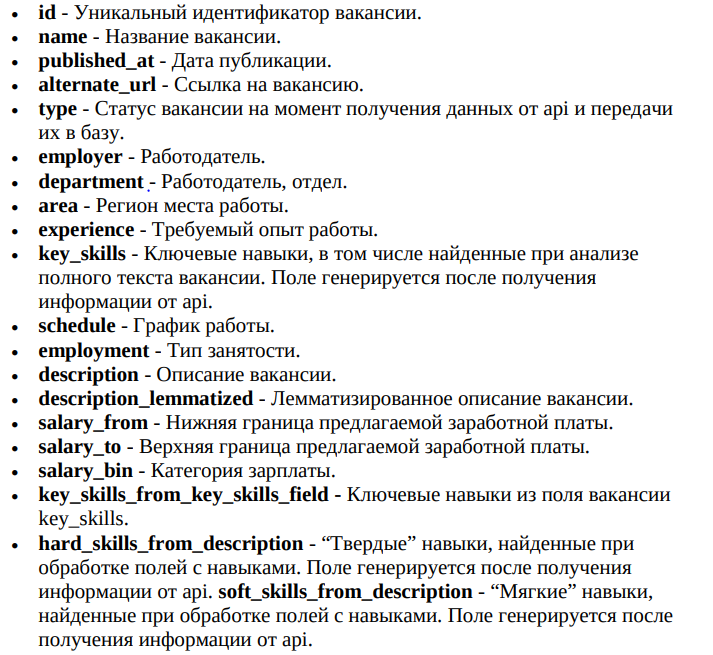

## 1. Выполнение загрузки данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_da_f = pd.read_excel(r'C:/Users/Admin/Downloads/vacancies_da.xlsx') # читаем файл с данными

In [3]:
data_da_f.head(10) # выводим первые 10 строк 

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация
5,100059110,Senior Data Analyst (Цифровой билайн),2024-06-11 11:45:29,https://hh.ru/vacancy/100059110,Открытая,билайн,"билайн: ИТ, Data, Digital",Москва,Middle (3-6 years),"['Python', 'SQL', 'Математическая статистика']",Удаленная работа,Полная занятость,"сегодня билайн — компания изменений, чутко реа...",сегодня билайн компания изменение чутко реагир...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика",NaN,NaN
6,100060772,Аналитик данных,2024-05-24 11:56:20,https://hh.ru/vacancy/100060772,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,один из ключевых партнеров центра занятости на...,ключевой партнер центр занятость население раб...,100000.0,NaN,ЗП не указана,NaN,NaN,NaN
7,100069131,Дата аналитик,2024-05-24 13:05:01,https://hh.ru/vacancy/100069131,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),"['Документация', 'Проактивность', 'Коммуникация']",Полный день,Полная занятость,команда данных по инвестиционным продуктам. мы...,команда данные инвестиционный продукт развиват...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация, Проактивность"
8,100069821,Аналитик данных,2024-06-10 16:49:49,https://hh.ru/vacancy/100069821,Открытая,МТС,«МТС»,Казань,Junior+ (1-3 years),[],Полный день,Полная занятость,мтс — это мультисервисная цифровая экосистема....,мтс мультисервисный цифровой экосистема создав...,72000.0,NaN,ЗП не указана,NaN,NaN,NaN
9,100071014,Аналитик данных,2024-06-07 11:08:22,https://hh.ru/vacancy/100071014,Открытая,Россети Урал,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,пао «россети урал» — крупнейшая электросетевая...,россеть урал крупный электросетевой компания у...,510

In [4]:
data_ds_f = pd.read_excel('C:/Users/Admin/Downloads/vacancies_ds.xlsx') # читаем файл с данными

In [5]:
data_ds_f.head(10) # выводим первые 10 строк

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100049339,Стажер Data Science (Новосибирск),2024-05-24 10:44:01,https://hh.ru/vacancy/100049339,Открытая,СБЕР,Сбер для экспертов,Новосибирск,Junior (no experince),[],Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
1,100051447,Data Scientist,2024-05-24 10:58:18,https://hh.ru/vacancy/100051447,Открытая,Бюро кредитных историй Скоринг Бюро,NaN,Москва,Junior+ (1-3 years),"['Python', 'Hadoop', 'Machine Learning', 'Рабо...",Удаленная работа,Полная занятость,бюро кредитных историй «скоринг бюро» является...,бюро кредитный история скоринг бюро являться к...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Big Data, Python, Spark, Hadoop, ...",Pandas,"Документация, Аналитическое мышление"
2,100070495,ML Engineer / Data Scientist,2024-05-24 13:15:26,https://hh.ru/vacancy/100070495,Открытая,ГК ФСК,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'Machine Learning', 'Doc...",Полный день,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,NaN,NaN,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,...",NaN,NaN
3,100076648,Team Lead Data Science,2024-05-24 14:07:00,https://hh.ru/vacancy/100076648,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,наша команда разрабатывает модели машинного об...,наш команда разрабатывать модель машинный обуч...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
4,100077910,Data Analyst / Data Scientist,2024-06-08 14:17:47,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle (3-6 years),"['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,350000.0,NaN,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,...",NaN,Аналитическое мышление
5,100079219,Senior Data Scientist MLE,2024-06-08 14:29:15,https://hh.ru/vacancy/100079219,Открытая,Автомакон,NaN,Москва,Middle (3-6 years),"['Python', 'sklearn', 'PostgreSQL', 'numpy', '...",Удаленная работа,Полная занятость,обязанности: собирать данные из dwh; эксперим...,обязанность собирать данные dwh экспериментиро...,300000.0,450000.0,Больше 300 тысяч,"ml, Python, numpy, scipy, pandas, sklearn, Cli...",Pandas,Документация
6,100088790,Data Scientist,2024-05-24 15:44:41,https://hh.ru/vacancy/100088790,Открытая,Ростелеком,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Python', 'Machine Learning', 'SQL', 'Big Dat...",Удаленная работа,Полная занятость,"привет, будущий заклинатель данных! хочешь при...",привет будущий заклинатель данные хотеть присо...,NaN,NaN,ЗП не указана,"Python, Big Data, SQL, Machine Learning, Git",Pandas,NaN
7,100094269,Middle/Senior Data Scientist (LLM),2024-05-24 16:33:00,https://hh.ru/vacancy/100094269,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,ищем senior\middle+ data scientist в команду s...,искать senior middle data scientist команда sb...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
8,100096283,Эксперт Data Science,2024-05-24 16:56:18,https://hh.ru/vacancy/100096283,Открытая,МТС Финтех,МТС Банк. Головной офис,Москва,Junior+ (1-3 years),"['Python', 'Документация', 'SQL']",Полный день,Полная занятость,мтс финтех – одно из ключевых направлений разв...,мтс финтех ключевой направление развитие групп...,NaN,NaN,ЗП не указана,"Python, SQL",NaN,Документация
9,100096836,Data Scientist/Data miner,2024-05-24 17:01:31,https://hh.ru/vacancy/100096836,Открытая,Интерлизинг,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Python', 'Работа с базами данных', 'Статисти...",Полный день,Полная занятость,интерлизинг – федеральная лизинговая к

**Вывод по разделу 1**

Загрузка данных выполнена успешна

## 2. Выполнение предобработки данных

In [6]:
data_ds_f.info() # выводим побщую информацию о данных для таблицы с вканасиями дата сайнтистов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     974 non-null    object        
 4   type                              974 non-null    object        
 5   employer                          974 non-null    object        
 6   department                        413 non-null    object        
 7   area                              974 non-null    object        
 8   experience                        974 non-null    object        
 9   key_skills                        974 non-null    object        
 10  schedule                          974 non-null    

In [7]:
data_da_f.info()# выводим побщую информацию о данных для таблицы с вканасиями дата аналитиков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

### 2.1 Ищем пропуски в данных

In [8]:
data_da_f.isna().sum() # считаем пропуски в данных

id                                     0
name                                   0
published_at                           0
alternate_url                          0
type                                   0
employer                               0
department                          1280
area                                   0
experience                             0
key_skills                             0
schedule                               0
employment                             0
description                            0
description_lemmatized                 0
salary_from                         1453
salary_to                           1573
salary_bin                             0
key_skills_from_key_skills_field     708
hard_skills_from_description        1383
soft_skills_from_description        1213
dtype: int64

In [9]:
data_ds_f.isna().sum()# считаем пропуски в данных

id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                          561
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         886
salary_to                           892
salary_bin                            0
key_skills_from_key_skills_field    453
hard_skills_from_description        525
soft_skills_from_description        680
dtype: int64

**Вывод по разделу 2.1**

Критичные пропуски выявлены в столбцах с зарплатой, замена будет выполнена в следующих разделах

### 2.2 Ищем дубликаты

In [10]:
# ищем дубликаты
data_da_f[data_da_f.duplicated(['employer', 'name','key_skills','description'], keep=False)]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
6,100060772,Аналитик данных,2024-05-24 11:56:20,https://hh.ru/vacancy/100060772,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,один из ключевых партнеров центра занятости на...,ключевой партнер центр занятость население раб...,100000.0,NaN,ЗП не указана,NaN,NaN,NaN
7,100069131,Дата аналитик,2024-05-24 13:05:01,https://hh.ru/vacancy/100069131,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),"['Документация', 'Проактивность', 'Коммуникация']",Полный день,Полная занятость,команда данных по инвестиционным продуктам. мы...,команда данные инвестиционный продукт развиват...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация, Проактивность"
13,100080293,Data analyst / Аналитик данных,2024-05-24 14:36:52,https://hh.ru/vacancy/100080293,Открытая,Колл Солюшенс,NaN,Санкт-Петербург,Middle (3-6 years),"['Анализ данных', 'Проактивность', 'SQL', 'Pyt...",Полный день,Полная занятость,обязанности: исследование поведения пользова...,обязанность исследование поведение пользовател...,NaN,NaN,ЗП не указана,"SQL, Python, Airflow, Анализ данных, Базы данн...",NaN,Проактивность
14,100082545,Аналитик данных (Отдел по анализу конкурентов),2024-06-05 11:38:18,https://hh.ru/vacancy/100082545,Открытая,Ozon,Ozon Офис и Коммерция,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,вам предстоит: осуществлять многофакторный а...,предстоять осуществлять многофакторный анализ ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,99985864,Аналитик данных в отдел онлайн-маркетинга (мон...,2024-05-23 18:41:27,https://hh.ru/vacancy/99985864,Открытая,Леруа Мерлен,ИТ,Москва,Junior+ (1-3 years),"['Проактивность', 'Коммуникация', 'SQL', 'ad-h...",Гибкий график,Полная занятость,леруа мерлен — data-driven компания с передовы...,леруа мерлен data driven компания передовой ит...,NaN,NaN,ЗП не указана,"SQL, ad-hoc, A/B тесты, ETL, LTV, Python, Post...",NaN,"Коммуникация, Проактивность"
1797,99986822,Аналитик данных/специалист Excel,2024-06-10 18:58:20,https://hh.ru/vacancy/99986822,Открытая,СКАЙ БОНД,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Грамотная речь', 'Сводные таблицы', 'Сбор и ...",Удаленная работа,Полная занятость,sky bond – это агентство финансовых консультан...,sky bond агентство финансовый консультант евро...,50000.0,NaN,ЗП не указана,"Пользователь ПК, Работа в команде, Грамотная р...",NaN,NaN
1798,99988999,Аналитик данных на производстве \ Data Analyst...,2024-05-23 19:35:56,https://hh.ru/vacancy/99988999,Открытая,Марс,NaN,Ступино,Junior+ (1-3 years),"['Анализ данных', 'SQL', 'MS Power BI', 'Pytho...",Гибкий график,Полная занятость,"аналитик будет заниматься сбором, обработкой, ...",аналитик заниматься сбор обработка изучение ан...,NaN,NaN,ЗП не указана,"MS Power BI, Аналитика, Python, SQL, Tableau, ...",NaN,NaN
1799,99989203,Аналитик данных на производстве \ Data Analyst...,2024-05-23 19:40:04,https://hh.ru/vacancy/99989203,Открытая,Марс,NaN,Одинцово,Junior+ (1-3 years),"['Анализ данных', 'SQL', 'MS Power BI', 'Pytho...",Полный день,Полная занятость,"аналитик будет заниматься сбором, обработкой, ...",аналитик заниматься сбор обработка изучение ан...,NaN,NaN,ЗП не указана,"MS Powe

In [11]:
# ищем дубликаты
data_ds_f[data_ds_f.duplicated(['employer', 'name','key_skills','description'], keep=False)]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
2,100070495,ML Engineer / Data Scientist,2024-05-24 13:15:26,https://hh.ru/vacancy/100070495,Открытая,ГК ФСК,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'Machine Learning', 'Doc...",Полный день,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,NaN,NaN,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,...",NaN,NaN
3,100076648,Team Lead Data Science,2024-05-24 14:07:00,https://hh.ru/vacancy/100076648,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,наша команда разрабатывает модели машинного об...,наш команда разрабатывать модель машинный обуч...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
7,100094269,Middle/Senior Data Scientist (LLM),2024-05-24 16:33:00,https://hh.ru/vacancy/100094269,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,ищем senior\middle+ data scientist в команду s...,искать senior middle data scientist команда sb...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
10,100293732,Cпециалист по работе с данными (Data Scientist),2024-06-10 11:49:46,https://hh.ru/vacancy/100293732,Открытая,Открытый код,NaN,Самара,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,"что нужно делать: анализ исходных данных, очи...",нужно делать анализ исходный данные очистка ау...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN
11,100296110,Эконометрист / Data scientist,2024-05-27 08:31:02,https://hh.ru/vacancy/100296110,Открытая,Okkam,NaN,Москва,Middle (3-6 years),"['Pandas', 'Коммуникация']",Полный день,Полная занятость,привет!мы - коммуникационная группа okkam. наш...,привет коммуникационный группа okkam наш специ...,NaN,NaN,ЗП не указана,NaN,Pandas,Коммуникация
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,99925786,Junior Data Scientist (NLP),2024-05-23 10:06:18,https://hh.ru/vacancy/99925786,Открытая,Молвер,NaN,Санкт-Петербург,Junior (no experince),"['Python', 'Data Mining', 'Математическая стат...",Удаленная работа,Полная занятость,мы– это новый технологический продукт в сфере ...,новый технологический продукт сфера ия наш роб...,60000.0,NaN,ЗП не указана,"Python, Математическая статистика, Git, Data M...",NaN,NaN
965,99925787,Junior Data Scientist (NLP),2024-05-23 10:06:18,https://hh.ru/vacancy/99925787,Открытая,Молвер,NaN,Екатеринбург,Junior (no experince),"['Python', 'Data Mining', 'Математическая стат...",Удаленная работа,Полная занятость,мы– это новый технологический продукт в сфере ...,новый технологический продукт сфера ия наш роб...,60000.0,NaN,ЗП не указана,"Python, Математическая статистика, Git, Data M...",NaN,NaN
966,99925788,Junior Data Scientist (NLP),2024-05-23 10:06:18,https://hh.ru/vacancy/99925788,Открытая,Молвер,NaN,Новосибирск,Junior (no experince),"['Python', 'Data Mining', 'Математическая стат...",Удаленная работа,Полная занятость,мы– это новый технологический продукт в сфере ...,новый технологический продукт сфера ия наш роб...,60000.0,NaN,ЗП не указана,"Python, Математическая статистика, Git, Data M...",NaN,NaN
967,99925789,Junior Data Scientist (NLP),2024-05-23 10:06:18,https://hh.ru/vacancy/99925789,Открытая,Молвер,NaN,Казань,Junior (no experince),"['Python', 'Data Mining', 'Математическая стат...",Удаленная работа,Полная занятость,мы– это новый технологический продукт в сфере ...,новый технологический продукт сфера ия наш роб...,60000.0,NaN,ЗП не указана,"Python, Математическая статистика, Git, Data M...",NaN,NaN


**Вывод по разделу 2.2**

Явных дубликатов не выявлено. 
В целом выявлены вакансий, в которых полностью совпадают значения в полях `employer`, `name`, `key_skills`, `dscription`.
При этом существуют различия в дате публикации, что целом говорит о том, что выявленные строки не являются дубликатами, так как вакансии могли быть опубликованы повторно, по причинам необъходимости найма новых сотрудников с аналогичными требованиями

Дополнительно определим минимальную и максимальную даты датасета и ограничили выборку период с 01.03.2024 по 31.05.2024

In [12]:
min_data = data_da_f['published_at'].min()
min_data

Timestamp('2024-02-13 21:45:51')

In [13]:
max_data = data_da_f['published_at'].max()
max_data

Timestamp('2024-06-11 15:07:30')

In [14]:
min_data_ds = data_ds_f['published_at'].min()
min_data_ds

Timestamp('2024-02-29 15:01:35')

In [15]:
max_data_ds = data_ds_f['published_at'].max()
max_data_ds

Timestamp('2024-06-11 12:49:09')

In [16]:
# меняем формат данных 
data_da_f['published_at']=pd.to_datetime(data_da_f['published_at'])

In [17]:
# меняем формат данных 
data_ds_f['published_at']=pd.to_datetime(data_ds_f['published_at'])

In [18]:
# ограничиваем массив данных периодом с марта по май 2024
data_da = data_da_f.query('published_at>="2024-03-01 00:00:00" and published_at <= "2024-05-31 23:59:59"')

In [19]:
# ограничиваем массив данных периодом с марта по май 2024
data_ds = data_ds_f.query('published_at>="2024-03-01 00:00:00" and published_at <= "2024-05-31 23:59:59"')

## 3. Исследовательский анализ данных.

### 3.1 Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.

In [20]:
data_da.groupby('name')['id'].count() # группируем данные по названию вакансий

name
Antifraud / data analyst                                                   1
BI аналитик / аналитик данных (сквозная, web - аналитика, визуализация)    1
BI-analyst \ Data analyst \ Аналитик данных (Senior)                       1
BI-Аналитик/Бизнес-Аналитик/Аналитик данных                                1
BI-аналитик / Data Analyst / Аналитик данных                               1
                                                                          ..
Финансовый аналитик / Аналитик данных                                      1
Финансовый аналитик данных                                                 1
Финансовый аналитик/ Data Analyst / Data scientist                         1
Эксперт по цифровым технологиям аудита (Data Analyst)                      2
Эксперт-аналитик данных в группу цифрового аудита                          2
Name: id, Length: 627, dtype: int64

In [21]:
data_da.loc[:,'name']=data_da['name'].str.lower() # названия вакансий приводит к нижнему регистру

In [22]:
# Определяем фразы для поиска
phrases = ['аналитик данных', 'data analyst', 'дата аналитик']

# Функция для удаления всего до и после фраз
def extract_phrase(text, phrases):
    for phrase in phrases:
        if phrase in text:
            return phrase
    return 0

C:\Users\Admin\AppData\Local\Temp\ipykernel_12016\2437265701.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_da.loc[:,'vac_name'] = data_da['name'].apply(lambda x: extract_phrase(x, phrases))


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_name
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,аналитик данных
1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",...,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,аналитик данных
2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,аналитик данных
3,100046788,ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",...,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,аналитик данных
4,100056244,аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],...,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,аналитик данных


In [23]:
data_da['vac_name'].isnull().count() # проверяем, что все строки в столбце vac_name заполнены данными

1410

In [24]:
data_da.loc[:,'vac_name'] = data_da['vac_name'].str.replace('data analyst','аналитик данных') #  делаем замену значений в стоблце vac_name

In [25]:
data_da.loc[:,'vac_name'] = data_da['vac_name'].str.replace('дата аналитик','аналитик данных') #  делаем замену значений в стоблце vac_name

In [26]:
name_grouped = data_da.groupby('experience')['id'].count().reset_index().sort_values(by='id', ascending=False) # группируем данные для расчета количества вакансий в разбивке по грейдам
name_grouped 

,experience,id
1,Junior+ (1-3 years),850
2,Middle (3-6 years),442
0,Junior (no experince),108
3,Senior (6+ years),10


In [27]:
name_grouped = name_grouped.rename(columns ={'id':'vacancy_count'}) # переименовываем колонку
name_grouped

,experience,vacancy_count
1,Junior+ (1-3 years),850
2,Middle (3-6 years),442
0,Junior (no experince),108
3,Senior (6+ years),10


In [28]:
name_grouped['ratio,%'] = (round(name_grouped['vacancy_count']/name_grouped['vacancy_count'].sum(),2))*100 # считаем долю вакансий по грейдам
name_grouped

,experience,vacancy_count,"ratio,%"
1,Junior+ (1-3 years),850,60.0
2,Middle (3-6 years),442,31.0
0,Junior (no experince),108,8.0
3,Senior (6+ years),10,1.0


#### Повторяем действия для датафрейма с вакансиями data scientist 

In [29]:
data_ds.groupby('name')['id'].count() # группируем данные по названию вакансий

name
Assistant Professor - Data Science&AI (english)                            1
Associate Professor - Data Science&AI (english)                            2
Computer Vision Engineer \ Data Scientist в команду Layer, SberDevices.    2
Cпециалист по работе с данными (Data Scientist)                            1
Data Analyst (Data Science и клиентская аналитика)                         2
                                                                          ..
Эконометрист / Data scientist                                              3
Эксперт Data Science                                                       2
Эксперт Data Science в направление Андеррайтинг                            1
Эксперт Группа аналитики и моделирования (Data scientist)                  1
Эксперт по моделированию и анализу данных / Data Scientist                 1
Name: id, Length: 400, dtype: int64

In [30]:
data_ds.loc[:,'name']=data_ds['name'].str.lower()  # названия вакансий приводим к нижнему регистру

In [31]:
# Определяем фразы для поиска
phrases_ds = ['data scientist', 'data science']

In [32]:
# Создаем новый столбец, содержащий только указанные фразы
data_ds.loc[:,'vac_name'] = data_ds['name'].apply(lambda x: extract_phrase(x, phrases_ds))
data_ds.head(5) # Выводим результат

C:\Users\Admin\AppData\Local\Temp\ipykernel_12016\1494564058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ds.loc[:,'vac_name'] = data_ds['name'].apply(lambda x: extract_phrase(x, phrases_ds))


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_name
0,100049339,стажер data science (новосибирск),2024-05-24 10:44:01,https://hh.ru/vacancy/100049339,Открытая,СБЕР,Сбер для экспертов,Новосибирск,Junior (no experince),[],...,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,data science
1,100051447,data scientist,2024-05-24 10:58:18,https://hh.ru/vacancy/100051447,Открытая,Бюро кредитных историй Скоринг Бюро,NaN,Москва,Junior+ (1-3 years),"['Python', 'Hadoop', 'Machine Learning', 'Рабо...",...,Полная занятость,бюро кредитных историй «скоринг бюро» является...,бюро кредитный история скоринг бюро являться к...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Big Data, Python, Spark, Hadoop, ...",Pandas,"Документация, Аналитическое мышление",data scientist
2,100070495,ml engineer / data scientist,2024-05-24 13:15:26,https://hh.ru/vacancy/100070495,Открытая,ГК ФСК,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'Machine Learning', 'Doc...",...,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,NaN,NaN,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,...",NaN,NaN,data scientist
3,100076648,team lead data science,2024-05-24 14:07:00,https://hh.ru/vacancy/100076648,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],...,Полная занятость,наша команда разрабатывает модели машинного об...,наш команда разрабатывать модель машинный обуч...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,data science
6,100088790,data scientist,2024-05-24 15:44:41,https://hh.ru/vacancy/100088790,Открытая,Ростелеком,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Python', 'Machine Learning', 'SQL', 'Big Dat...",...,Полная занятость,"привет, будущий заклинатель данных! хочешь при...",привет будущий заклинатель данные хотеть присо...,NaN,NaN,ЗП не указана,"Python, Big Data, SQL, Machine Learning, Git",Pandas,NaN,data scientist


In [33]:
data_ds.loc[:,'vac_name'] = data_ds['vac_name'].str.replace('data science','data scientist') #  делаем замену значений в стоблце vac_name

In [34]:
name_grouped_ds = data_ds.groupby('experience')['id'].count().reset_index().sort_values(by='id', ascending=False) # группируем данные для расчета количества вакансий в разбивке по грейдам
name_grouped_ds 

,experience,id
2,Middle (3-6 years),357
1,Junior+ (1-3 years),334
0,Junior (no experince),37
3,Senior (6+ years),24


In [35]:
name_grouped_ds = name_grouped_ds.rename(columns ={'id':'vacancy_count'}) # переименовываем столбец
name_grouped_ds

,experience,vacancy_count
2,Middle (3-6 years),357
1,Junior+ (1-3 years),334
0,Junior (no experince),37
3,Senior (6+ years),24


In [36]:
name_grouped_ds['ratio,%'] = (round(name_grouped_ds['vacancy_count']/name_grouped_ds['vacancy_count'].sum(),2))*100 # считаем долю вакансий по грейдам
name_grouped_ds

,experience,vacancy_count,"ratio,%"
2,Middle (3-6 years),357,47.0
1,Junior+ (1-3 years),334,44.0
0,Junior (no experince),37,5.0
3,Senior (6+ years),24,3.0


In [37]:
data = pd.concat([data_da,data_ds], ignore_index=True) # соединяем 2 таблицы

In [38]:
a=data[data['vac_name'].isnull()] # проверка, что все поля в столбце vac_name заполнены
a

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_name


In [39]:
a['name'].unique() # проверка

array([], dtype=object)

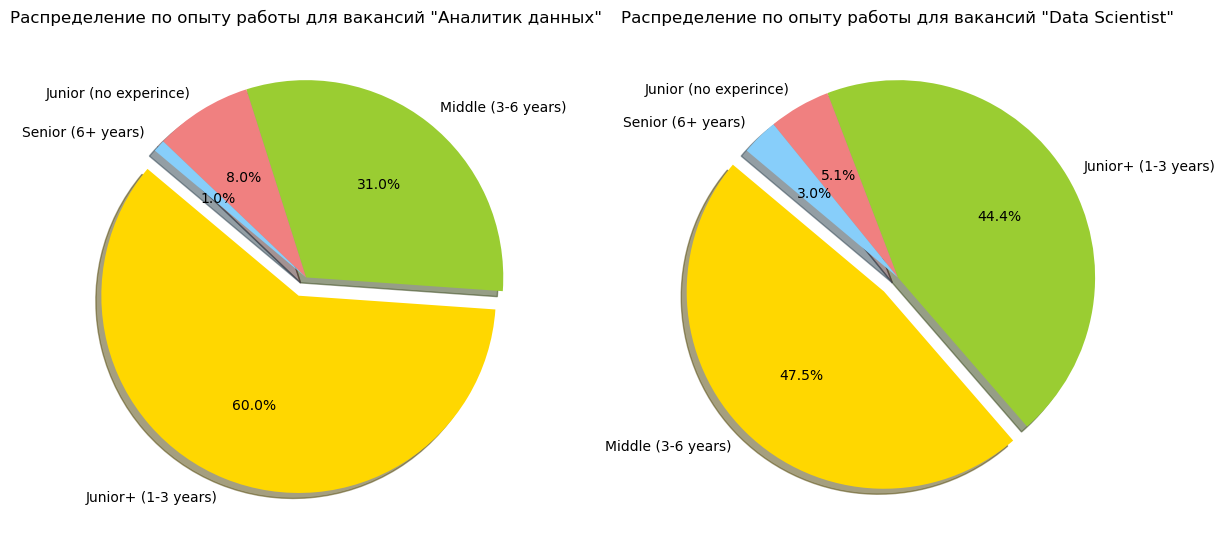

In [40]:
# Данные для первой таблицы
labels1 = name_grouped['experience']
sizes1 = name_grouped['ratio,%']
colors1 = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode1 = (0.1, 0, 0, 0)  # Выделим первый кусок (Junior)

# Данные для второй таблицы
labels2 = name_grouped_ds['experience']
sizes2 = name_grouped_ds['ratio,%']
colors2 = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode2 = (0.1, 0, 0, 0)  # Выделим первый кусок (Junior)

# Создание диаграмм
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.pie(sizes1, explode=explode1, labels=labels1, colors=colors1, autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('Распределение по опыту работы для вакансий "Аналитик данных"')

ax2.pie(sizes2, explode=explode2, labels=labels2, colors=colors2, autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('Распределение по опыту работы для вакансий "Data Scientist"')

plt.show()

**Вывод по разделу 3.1**

На основании графиков мы видим, что для вакансий "Аналитик данных" требуется большего всего специалистов грейда Junior+ (1-3 years),  а именно 60%.
При этом для вакансий "Data Scientist" большего всего требуется специалистов грейда Middle (3-6 years), а именно 47,5%. На втором месте по необходимости для вакансий "Data Scientist" специалисты грейда Junior+ (1-3 years), таких вакансий 44,4%


### 3.2 Определение типичного места работы для Аналитика данных и Бизнес-аналитика по следующим параметрам: ТОП-работодателей по числу вакансий, зарплата, тип занятости, график работы.

#### 3.2.1 ТОП-работодателей по числу вакансий

In [41]:
data_da.loc[:,'published_at']=pd.to_datetime(data_da['published_at']) # перерводим значения в столбце нужному формату

In [42]:
data_da.loc[:,'month']=data['published_at'].dt.month # выделяем столбец с месяцем публикации вакансии

C:\Users\Admin\AppData\Local\Temp\ipykernel_12016\229619183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_da.loc[:,'month']=data['published_at'].dt.month # выделяем столбец с месяцем публикации вакансии


In [43]:
data_ds.loc[:,'published_at']=pd.to_datetime(data_da['published_at']) # перерводим значения в столбце нужному формату

In [44]:
data_ds.loc[:,'month']=data['published_at'].dt.month # выделяем столбец с месяцем публикации вакансии

C:\Users\Admin\AppData\Local\Temp\ipykernel_12016\6941202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ds.loc[:,'month']=data['published_at'].dt.month # выделяем столбец с месяцем публикации вакансии


In [45]:
data_da.head(5) # выводим первые 5 строк датафрейма

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_name,month
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,аналитик данных,5
1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",...,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,аналитик данных,5
2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,аналитик данных,5
3,100046788,ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",...,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,аналитик данных,5
4,100056244,аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],...,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,аналитик данных,5


In [46]:
employer_counts_da = data_da['employer'].value_counts().head(5) # подсчет количества вакансий по работодателям
employer_counts_da

employer
СБЕР                      210
Ozon                       31
WILDBERRIES                27
Т1                         22
МАГНИТ, Розничная сеть     21
Name: count, dtype: int64

In [47]:
# Фильтрация данных по топ-5 работодателям
top_employers_da = employer_counts_da.index
df_top_da = data_da[data_da['employer'].isin(top_employers_da)] 
df_top_da.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_name,month
7,100069131,дата аналитик,2024-05-24 13:05:01,https://hh.ru/vacancy/100069131,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),"['Документация', 'Проактивность', 'Коммуникация']",...,команда данных по инвестиционным продуктам. мы...,команда данные инвестиционный продукт развиват...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация, Проактивность",аналитик данных,5
10,100077503,data analyst,2024-05-24 14:14:00,https://hh.ru/vacancy/100077503,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),['Pandas'],...,в команду data science ищем руководителя напра...,команда data science искать руководитель напра...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,аналитик данных,5
18,100097062,data analyst,2024-05-24 17:05:00,https://hh.ru/vacancy/100097062,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),"['confluence', 'Документация']",...,"мы, управление зарплатных проектов блока сеть ...",управление зарплатной проект блок сеть продажа...,NaN,NaN,ЗП не указана,NaN,confluence,Документация,аналитик данных,5
19,100101205,аналитик данных в клиентский сервис,2024-05-28 13:45:37,https://hh.ru/vacancy/100101205,Открытая,Ozon,Ozon Офис и Коммерция,Москва,Junior+ (1-3 years),"['Python', 'Коммуникация', 'SQL', 'Торговая пл...",...,в отдел аналитики клиентского сервиса требуетс...,отдел аналитик клиентский сервис требоваться а...,NaN,NaN,ЗП не указана,"SQL, Python, Торговая площадка",NaN,Коммуникация,аналитик данных,5
20,100103095,аналитик данных (антифрод),2024-05-28 13:45:38,https://hh.ru/vacancy/100103095,Открытая,Ozon,Ozon Офис и Коммерция,Москва,Junior+ (1-3 years),"['Python', 'SQL', 'Маркетплейс']",...,в отдел аналитики фрода и контроля качества тр...,отдел аналитик фрод контроль качество требоват...,NaN,NaN,ЗП не указана,"SQL, Python, Маркетплейс",NaN,NaN,аналитик данных,5


In [48]:
# Группировка данных по работодателям и месяцам
df_grouped_da = df_top_da.groupby(['month', 'employer']).size().unstack(fill_value=0)
df_grouped_da

employer,Ozon,WILDBERRIES,"МАГНИТ, Розничная сеть",СБЕР,Т1
month,,,,,
3,8,6,5,46,7
4,10,8,9,58,6
5,13,13,7,106,9


In [49]:
# Подсчет количества вакансий по работодателям
employer_counts_ds = data_ds['employer'].value_counts().head(5)
employer_counts_ds

employer
СБЕР            164
Ozon             24
Samokat.tech     18
Газпромбанк      15
Т1               15
Name: count, dtype: int64

In [50]:
# Фильтрация данных по топ-5 работодателям
top_employers_ds = employer_counts_ds.index
df_top_ds = data_ds[data_ds['employer'].isin(top_employers_ds)]
df_top_ds.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_name,month
0,100049339,стажер data science (новосибирск),2024-05-24 09:37:04,https://hh.ru/vacancy/100049339,Открытая,СБЕР,Сбер для экспертов,Новосибирск,Junior (no experince),[],...,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,data scientist,5
3,100076648,team lead data science,2024-05-24 10:28:18,https://hh.ru/vacancy/100076648,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],...,наша команда разрабатывает модели машинного об...,наш команда разрабатывать модель машинный обуч...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,data scientist,5
7,100094269,middle/senior data scientist (llm),2024-05-24 13:05:01,https://hh.ru/vacancy/100094269,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],...,ищем senior\middle+ data scientist в команду s...,искать senior middle data scientist команда sb...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,data scientist,5
13,100336712,"data scientist, маркетплейс, контент и товары",2024-05-24 14:36:52,https://hh.ru/vacancy/100336712,Открытая,Ozon,Ozon Информационные технологии,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'confluence', 'ИТ', 'IT']",...,мы ищем талантливого data scientist для нашей ...,искать талантливый data scientist наш команда ...,NaN,NaN,ЗП не указана,"Python, PyTorch, ИТ, IT",confluence,NaN,data scientist,5
24,100426833,junior data scientist,2024-05-24 20:56:32,https://hh.ru/vacancy/100426833,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),"['Python', 'Pandas', 'Юнит-экономика', 'SQL']",...,блок «управление благосостоянием» объединяет в...,блок управление благосостояние объединять упра...,NaN,NaN,ЗП не указана,"Python, SQL","Pandas, Юнит-экономика",NaN,data scientist,5


In [51]:
# Группировка данных по работодателям и месяцам
df_grouped_ds = df_top_ds.groupby(['month', 'employer']).size().unstack(fill_value=0)
df_grouped_ds

employer,Ozon,Samokat.tech,Газпромбанк,СБЕР,Т1
month,,,,,
3,6,7,1,56,2
4,13,10,12,61,5
5,5,1,2,47,8


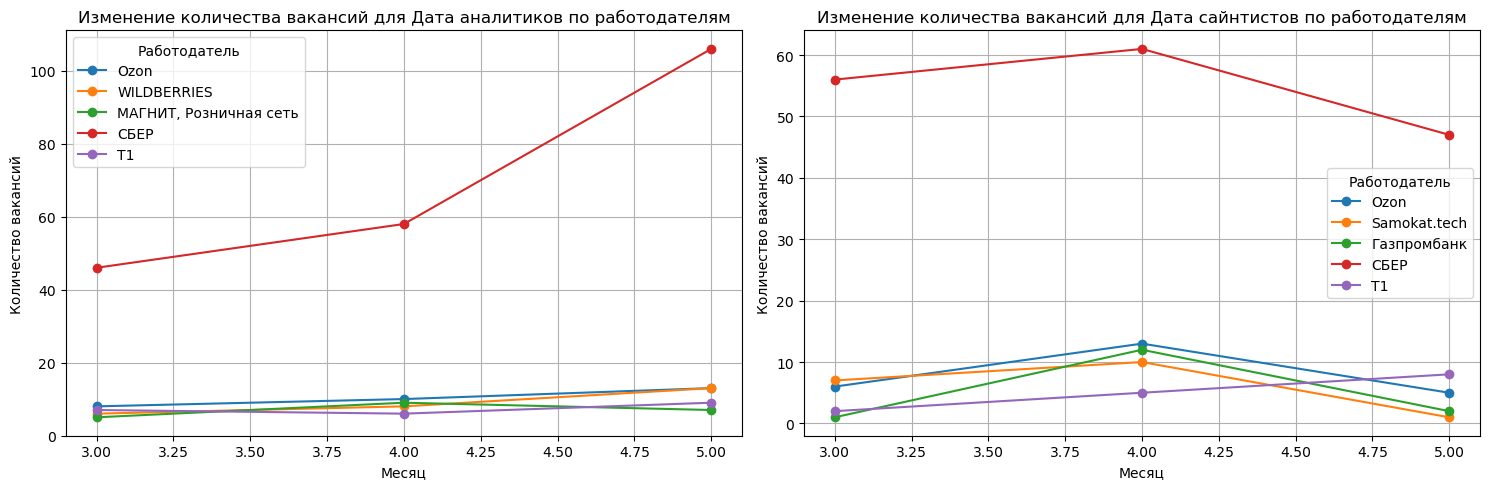

In [52]:
# Построение графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

df_grouped_da.plot(kind='line', marker='o', ax=axs[0])
axs[0].set_title('Изменение количества вакансий для Дата аналитиков по работодателям')
axs[0].set_xlabel('Месяц')
axs[0].set_ylabel('Количество вакансий')
axs[0].legend(title='Работодатель')
axs[0].grid(True)

df_grouped_ds.plot(kind='line', marker='o', ax=axs[1])
axs[1].set_title('Изменение количества вакансий для Дата сайнтистов по работодателям')
axs[1].set_xlabel('Месяц')
axs[1].set_ylabel('Количество вакансий')
axs[1].legend(title='Работодатель')
axs[1].grid(True)

plt.tight_layout()
plt.show()

**Вывод по разделу 3.2.1**

Мы проанлизировали помесячную динамику вакансий "Аналитик данных" и "Data Scientist" в разбивке по работодателям за период с марта по май 2024.

Во первых на графике мы видим, что в не зависимости от специальности больше всего вакансий у Сбера. 
Количество вакансий "Аналитика данных" достигает пика в мае, при этом, если говорить про вакансии "Data Scientist", то мы видим рост в апреле и уменьшение количества в маю.

Количество вакансий "Аналитика данных" компании Озон для вакансии Аналитика данных повторяет динамику Сбера. При этом вакансии компаний WILDBERRIES	и Банк ВТБ (ПАО) показывают рост с марта по май 2024 года.

Если говорить про вакансии "Data Scientist", то в топ работодателей попали такие компании как Ozon, Samokat.tech, Газпромбанк и Т1. Вакансии копаний Ozon и Газпромбанк в целом повторяют динамику Сбера

#### 3.2.2 Топ работадателей по числу вакансий в разбивке по грейдам

In [53]:
# формируем сводную таблицу для вывода топ работадателей с фильтрацией по вакансии и грейду
data.query('vac_name=="аналитик данных" and experience=="Junior (no experince)"').pivot_table(index='employer', values='id', aggfunc='count').sort_values(by='id',ascending=False).head(5)

,id
employer,
СБЕР,11
"МАГНИТ, Розничная сеть",5
"Согласие, страховая компания",4
ANCOR,2
"СИБУР, Группа компаний",2


In [54]:
# формируем сводную таблицу для вывода топ работадателей с фильтрацией по вакансии и грейду
data.query('vac_name=="аналитик данных" and experience=="Junior+ (1-3 years)"').pivot_table(index='employer', values='id', aggfunc='count').sort_values(by='id',ascending=False).head(5)

,id
employer,
СБЕР,137
"МАГНИТ, Розничная сеть",15
Ozon,15
Банк ВТБ (ПАО),15
ГКУ Центр занятости населения города Москвы,11


In [55]:
# формируем сводную таблицу для вывода топ работадателей с фильтрацией по вакансии и грейду
data.query('vac_name=="аналитик данных" and experience=="Middle (3-6 years)"').pivot_table(index='employer', values='id', aggfunc='count').sort_values(by='id',ascending=False).head(5)

,id
employer,
СБЕР,62
Т1,18
WILDBERRIES,16
Ozon,14
Яндекс,11


In [56]:
# формируем сводную таблицу для вывода топ работадателей с фильтрацией по вакансии и грейду
data.query('vac_name=="аналитик данных" and experience=="Senior (6+ years)"').pivot_table(index='employer', values='id', aggfunc='count').sort_values(by='id',ascending=False).head(5)

,id
employer,
Reinvent Baltics,2
Леруа Мерлен,2
Aramco Innovations,1
B2Broker,1
CloudPayments,1


In [57]:
# формируем сводную таблицу для вывода топ работадателей с фильтрацией по вакансии и греду
data.query('vac_name=="data scientist" and experience=="Junior (no experince)"').pivot_table(index='employer', values='id', aggfunc='count').sort_values(by='id',ascending=False).head(5)

,id
employer,
СБЕР,11
Молвер,5
Ozon,3
Правительство Москвы,3
Lamoda Tech,2


In [58]:
# формируем сводную таблицу для вывода топ работадателей с фильтрацией по вакансии и греду
data.query('vac_name=="data scientist" and experience=="Junior+ (1-3 years)"').pivot_table(index='employer', values='id', aggfunc='count').sort_values(by='id',ascending=False).head(5)

,id
employer,
СБЕР,78
Ростелеком,11
Сахалин - Остров Возможностей,9
1221Системс,7
Т1,7


In [59]:
# формируем сводную таблицу для вывода топ работадателей с фильтрацией по вакансии и греду
data.query('vac_name=="data scientist" and experience=="Middle (3-6 years)"').pivot_table(index='employer', values='id', aggfunc='count').sort_values(by='id',ascending=False).head(5)

,id
employer,
СБЕР,73
Ozon,15
WILDBERRIES,12
Samokat.tech,11
Газпромбанк,9


In [60]:
# формируем сводную таблицу для вывода топ работадателей с фильтрацией по вакансии и греду
data.query('vac_name=="data scientist" and experience=="Senior (6+ years)"').pivot_table(index='employer', values='id', aggfunc='count').sort_values(by='id',ascending=False).head(5)

,id
employer,
Fundraise Up,2
СБЕР,2
Sape,2
Aramco Innovations,2
БиАйЭй-Технолоджиз,2


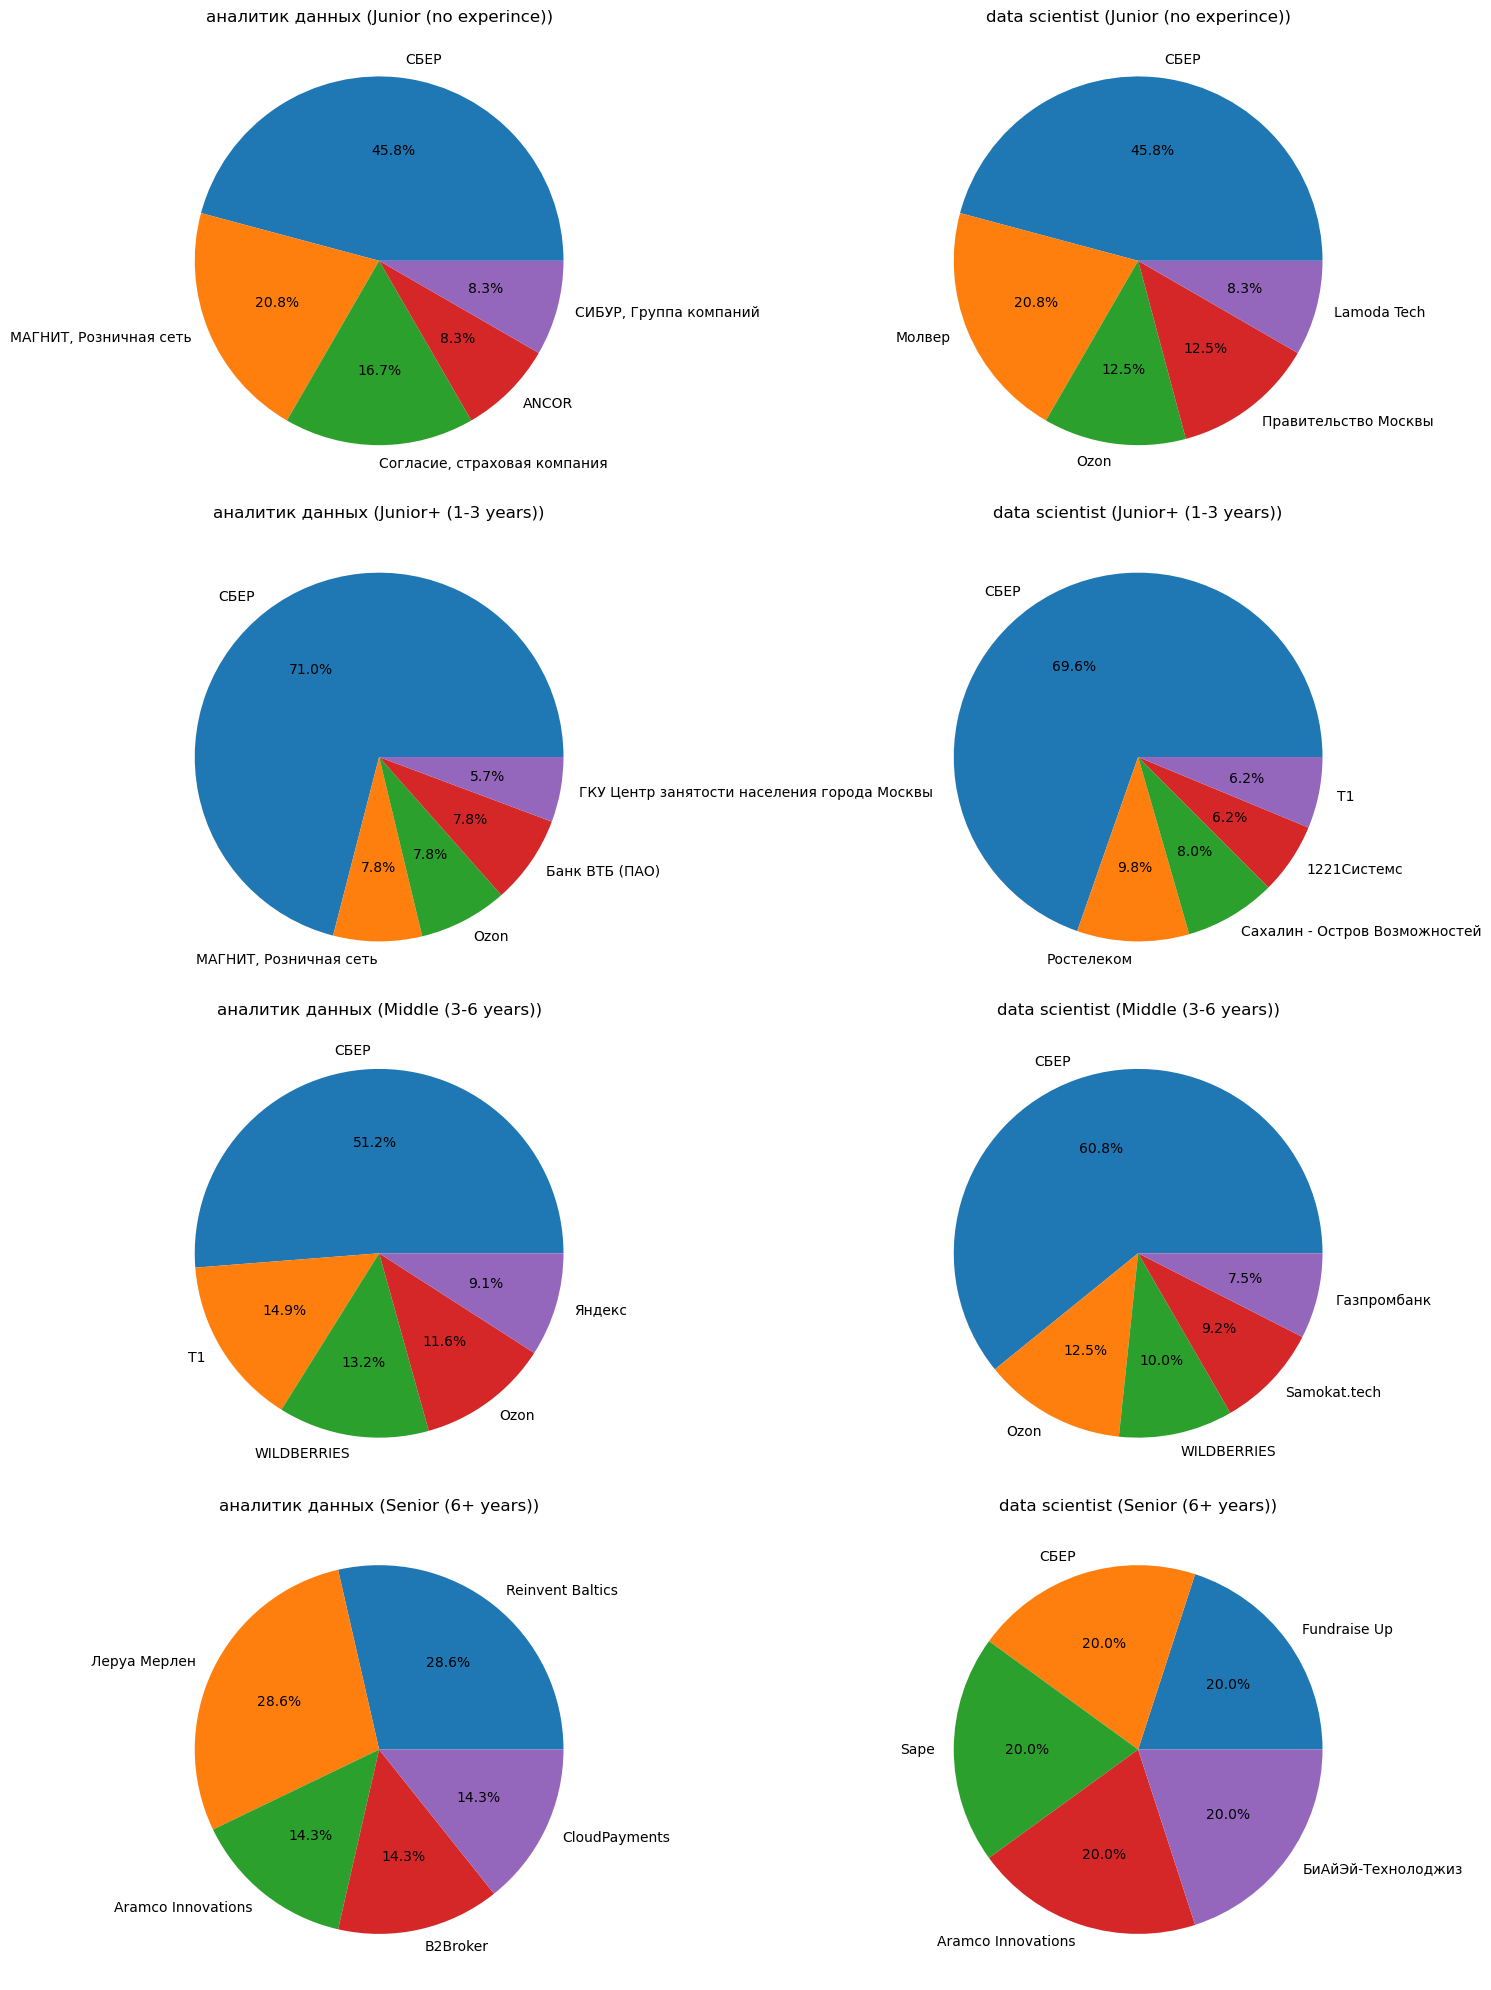

In [61]:
# Создание фигуры и осей
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Список специальностей и грейдов
specialties = ['аналитик данных', 'data scientist']
grades = ['Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)']

# Построение графиков
for i, grade in enumerate(grades):
    for j, specialty in enumerate(specialties):
        ax = axs[i, j]
        subset = data.query(f'vac_name=="{specialty}" and experience=="{grade}"').pivot_table(index='employer', values='id', aggfunc='count').sort_values(by='id', ascending=False).head(5)
        subset.plot(kind='pie', y='id', ax=ax, legend=False, autopct='%1.1f%%')
        ax.set_title(f'{specialty} ({grade})')
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

**Вывод по разделу 3.2.2**

Мы проанализировали ТОП-5 работодателей в зависимости от грейда, указанной в вакансии. 
Для вакансии аналитика данных греда Junior (no experince) на первом месте стоит Сбер, у которого большего всего вакансий. Таже картина повторяется и для вакансии data scientist. Также компании Сбер первая по числу вакансий и для грейдов Junior+ (1-3 years), и Middle (3-6 years) обоих специальностей.
Для грейда Senior (6+ years) вакансий аналитика данных на первом месте по числу вакансий стоит компания Леруа Мерлен, а для data scientist компания Fundraise Up

#### 3.2.3 Определение типичного места работы для вакансий "Аналитик данных" и "Data Scientist" в части предлагаемой зарплаты

In [62]:
# заменяем пустые значения в столбце с зарплатой средним значением по региону
for t in data['area'].unique():
    data.loc[(data['area'] == t) & (data['salary_from'].isna()), 'salary_from'] = \
    data.loc[(data['area'] == t), 'salary_from'].mean()
    data.loc[(data['area'] == t) & (data['salary_to'].isna()), 'salary_to'] = \
    data.loc[(data['area'] == t), 'salary_to'].mean() 

In [63]:
data[data['salary_to']. isnull ()] # проверяем  пустые значения в столбце с зарплатой

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_name
42,100377258,аналитик данных (менеджер по развитию),2024-05-27 15:17:29,https://hh.ru/vacancy/100377258,Открытая,Деловые Линии,NaN,Омск,Junior+ (1-3 years),"['Анализ данных', 'SQL', 'Power BI', 'Статисти...",...,Полная занятость,группа компаний &quot;деловые линии&quot;‚ оди...,группа компания quot деловой линия quot лидер ...,120000.0,NaN,ЗП не указана,"SQL, Анализ данных, Математическая статистика,...",NaN,NaN,аналитик данных
176,91481640,аналитик данных,2024-03-21 19:18:31,https://hh.ru/vacancy/91481640,Открытая,ТехноГрупп,NaN,Дзержинский,Junior+ (1-3 years),['Аналитическое мышление'],...,Полная занятость,компания техногрупп является лидирующим россий...,компания техногруппа являться лидировать росси...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление,аналитик данных
214,92444490,аналитик данных bi отдела автоматизации (г. во...,2024-04-18 08:11:35,https://hh.ru/vacancy/92444490,Открытая,Группа компаний АГРОЭКО,NaN,Белгород,Junior+ (1-3 years),['Документация'],...,Полная занятость,вакансия открыта в связи с расширением отдела ...,вакансия открывать связь расширение отдел авто...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,аналитик данных
225,92761981,аналитик данных / data analyst,2024-04-06 13:13:16,https://hh.ru/vacancy/92761981,Открытая,Марс,NaN,Ступино,Junior+ (1-3 years),[],...,Полная занятость,"мы ищем аналитика данных, который с помощью да...",искать аналитик данные помощь данные помогать ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,аналитик данных
227,92831135,"аналитик данных о реализации нефтепродуктов, т...",2024-04-27 12:50:59,https://hh.ru/vacancy/92831135,Открытая,ИК СИБИНТЕК,"ИК ""Сибинтек""",Рязань,Junior (no experince),"['Анализ данных', 'SQL', 'MS Access', 'Python'...",...,Полная занятость,обязанности: сбор и подготовка исходных данны...,обязанность сбор подготовка исходный данные ра...,61000.0,NaN,ЗП не указана,"SQL, Python, MS Access, Аналитическое мышление...",NaN,Документация,аналитик данных
272,93447350,стажер специалиста (аналитик данных),2024-03-06 06:06:41,https://hh.ru/vacancy/93447350,Открытая,"СИБУР, Группа компаний",Сибур,Северск (Томская область),Junior (no experince),['MS Excel'],...,Стажировка,"ооо «томскнефтехим», сибур холдинг приглашает ...",томскнефтехим сибур холдинг приглашать стажиро...,NaN,NaN,ЗП не указана,MS Excel,NaN,NaN,аналитик данных
306,93837132,аналитик данных,2024-03-28 08:02:35,https://hh.ru/vacancy/93837132,Открытая,РАТИМИР,NaN,Артем,Junior+ (1-3 years),[],...,Полная занятость,в обязанности будет входить:• анализ данных и ...,обязанность входить анализ данные интерпретаци...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,аналитик данных
329,94094674,аналитик данных,2024-03-07 12:15:06,https://hh.ru/vacancy/94094674,Открытая,МедСофт,NaN,Липецк,Middle (3-6 years),['Аналитическое мышление'],...,Полная занятость,о компании:аккредитованная it-компания медсофт...,компания аккредитовать it компания медсофт зан...,100000.0,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление,аналитик данных
342,94248757,менеджер по развитию (аналитик данных),2024-04-22 11:56:58,https://hh.ru/vacancy/94248757,Открытая,Деловые Линии,NaN,Омск,Junior+ (1-3 years),"['MS SQL', 'Бизнес-анализ', 'Power BI', 'Dax',...",...,Полная занятость,группа компаний &quot;деловые линии&quot;‚ оди...,группа компания quot деловой линия quot лидер ...,120000.0,NaN,ЗП не указана,"MS SQL, Бизнес-анализ, PostgreSQL, Базы данных...",NaN,NaN,аналитик данных
403,94719070,аналитик данных bi / щлз,2024-03-13 20:43:33,https://hh.ru/vacancy/94719070,Открытая,ДОМ.РФ,ДОМ.РФ ИТ,Щербинка,Junior+ (1-3 years),[],...,Полная занятость,"ао «щлз» – флагман российского лифтостроения, ...",ао щлз флагман российский лифтостроение работа...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,аналитик данных


In [64]:
data['salary_from'].fillna(0) # заполняем пустые значения нулями

0        60000.000000
1       136829.397516
2        90000.000000
3       136829.397516
4       136829.397516
            ...      
2157     60000.000000
2158     60000.000000
2159     60000.000000
2160    136829.397516
2161    136829.397516
Name: salary_from, Length: 2162, dtype: float64

In [65]:
data['salary_to'].fillna(0) # заполняем пустые значения нулями

0       119713.333333
1       214055.069231
2       119713.333333
3       214055.069231
4       214055.069231
            ...      
2157    120833.333333
2158    184995.000000
2159    203333.333333
2160    214055.069231
2161    214055.069231
Name: salary_to, Length: 2162, dtype: float64

In [66]:
data['salary_mean'] = data[['salary_from','salary_to']].mean(axis=1) # считаем среднее значение между данными с зарплатой с и по 
data.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_name,salary_mean
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.000000,119713.333333,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,аналитик данных,89856.666667
1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",...,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,136829.397516,214055.069231,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,аналитик данных,175442.233373
2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.000000,119713.333333,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,аналитик данных,104856.666667
3,100046788,ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",...,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,136829.397516,214055.069231,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,аналитик данных,175442.233373
4,100056244,аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],...,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,136829.397516,214055.069231,ЗП не указана,NaN,NaN,Документация,аналитик данных,175442.233373


In [67]:
data['salary_mean'].loc[data['vac_name'] == 'data scientist'].min()

53131.25

In [68]:
data['salary_mean'].loc[data['vac_name'] == 'data scientist'].max()

390000.0

In [69]:
data['salary_mean'].loc[data['vac_name'] == 'аналитик данных'].min()

26000.0

In [70]:
data['salary_mean'].loc[data['vac_name'] == 'аналитик данных'].max()

447750.0

In [71]:
salary_mean = data.pivot_table(index='experience', columns='vac_name', values='salary_mean',aggfunc='mean').reset_index() # формируем сводную таблицу со средней зарплатой в разбивке по вкансиям и грейдам 
salary_mean

vac_name,experience,data scientist,аналитик данных
0,Junior (no experince),155967.637839,127543.540078
1,Junior+ (1-3 years),165216.323361,155492.672877
2,Middle (3-6 years),175620.679376,174088.901933
3,Senior (6+ years),179558.998214,177853.786699


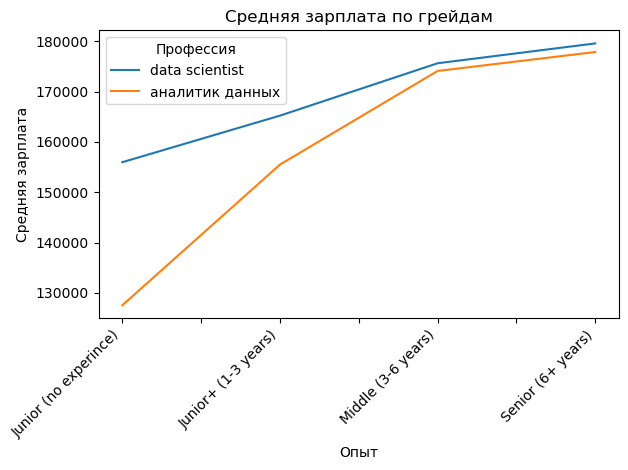

In [72]:
# Создание графика
fig, ax = plt.subplots()
salary_mean.plot(kind='line', x='experience', ax=ax)

# Добавление подписей и заголовков
ax.set_xlabel('Опыт')
ax.set_ylabel('Средняя зарплата')
ax.set_title('Средняя зарплата по грейдам')
ax.legend(title='Профессия')
plt.xticks(rotation=45, ha='right')

fig.tight_layout()

plt.show()

**Вывод по разделу 3.2.3**

Предлагаемая работодателями зарплата на начальном грейде больше у вакансий "Data Scientist" (156 тыс.руб.) чем у вакансий специальности "Аналитик данных" (127 тыс.руб.). При этом к грейду Senior с требуемым опытом больше 6 лет уровень зарплаты выравниваются, но с сохранением лидирования уровня зарплаты у вакансий "Data Scientist" - 180 тыс. руб., против зарплаты у вакансий "Аналитик данных" - 178 тыс. руб.

#### 3.2.4. Проанализируем среднюю зарплату по работодателям и регионам

In [73]:
employer_counts_tot = data['employer'].value_counts().head(1) # считаем количество вакансий в разбивке по работодателям и выбираем 1, у кого больше всего вакансий
employer_counts_tot

employer
СБЕР    374
Name: count, dtype: int64

In [74]:
# фильтруем массив данных по выбранному работодателю
top_employers_tot = employer_counts_tot.index
df_top = data[data['employer'].isin(top_employers_tot)]
df_top.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_name,salary_mean
6,100069131,дата аналитик,2024-05-24 13:05:01,https://hh.ru/vacancy/100069131,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),"['Документация', 'Проактивность', 'Коммуникация']",...,команда данных по инвестиционным продуктам. мы...,команда данные инвестиционный продукт развиват...,126878.378378,166829.545455,ЗП не указана,NaN,NaN,"Коммуникация, Документация, Проактивность",аналитик данных,146853.961916
7,100077503,data analyst,2024-05-24 14:14:00,https://hh.ru/vacancy/100077503,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),['Pandas'],...,в команду data science ищем руководителя напра...,команда data science искать руководитель напра...,136829.397516,214055.069231,ЗП не указана,NaN,Pandas,NaN,аналитик данных,175442.233373
11,100097062,data analyst,2024-05-24 17:05:00,https://hh.ru/vacancy/100097062,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),"['confluence', 'Документация']",...,"мы, управление зарплатных проектов блока сеть ...",управление зарплатной проект блок сеть продажа...,136829.397516,214055.069231,ЗП не указана,NaN,confluence,Документация,аналитик данных,175442.233373
20,100301503,data analyst (команда управления комплаенс),2024-05-27 09:05:09,https://hh.ru/vacancy/100301503,Открытая,СБЕР,Сбер. IT,Москва,Middle (3-6 years),[],...,"мы - команда управления комплаенс, ищем нового...",команда управление комплаенс искать новый data...,136829.397516,214055.069231,ЗП не указана,NaN,NaN,NaN,аналитик данных,175442.233373
24,100306066,аналитик данных,2024-05-27 09:31:00,https://hh.ru/vacancy/100306066,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),[],...,в команду управления по организации работы про...,команда управление организация работа проблемн...,136829.397516,214055.069231,ЗП не указана,NaN,NaN,NaN,аналитик данных,175442.233373


In [75]:
# Создание сводной таблицы по работодателям и регионам
pivot_table_da = df_top.query('vac_name == "аналитик данных"').pivot_table(values='salary_mean', index='area', columns= 'employer', aggfunc='mean', fill_value=0).sort_values(by='СБЕР', ascending=False)
pivot_table_da.reset_index()

employer,area,СБЕР
0,Москва,175483.840501
1,Казань,163016.666667
2,Санкт-Петербург,145469.792032
3,Нижний Новгород,120604.423077
4,Вельск,100000.000000
5,Екатеринбург,98797.222222
6,Майкоп,90000.000000
7,Самара,88333.333333
8,Пермь,57462.500000
9,Адыгейск,47500.000000


In [76]:
# Создание сводной таблицы по работодателям и регионам
pivot_table_ds = df_top.query('vac_name == "data scientist"').pivot_table(values='salary_mean', index='area', columns= 'employer', aggfunc='mean', fill_value=0).sort_values(by='СБЕР', ascending=False)
pivot_table_ds.reset_index()

employer,area,СБЕР
0,Москва,175571.531685
1,Санкт-Петербург,146853.961916
2,Новосибирск,139656.590909
3,Нижний Новгород,121536.884615
4,Екатеринбург,98797.222222
5,Сочи,80000.000000
6,Воронеж,75000.000000


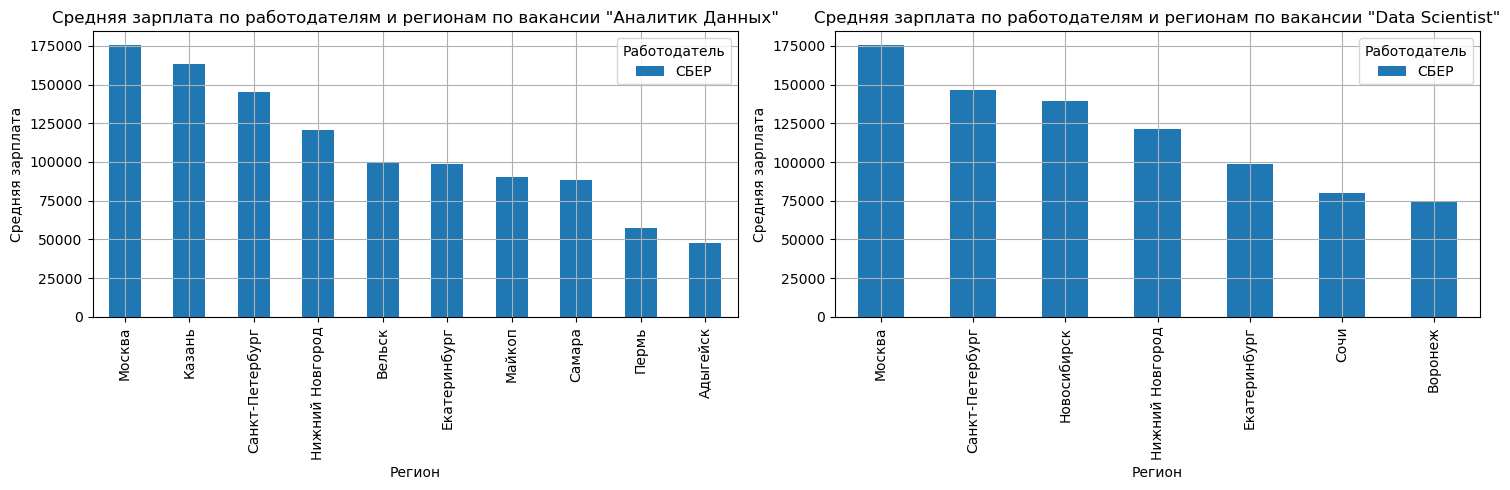

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Сортировка данных и построение графика для Аналитиков Данных
pivot_table_da.plot(kind='bar', ax=axs[0])
axs[0].set_title('Средняя зарплата по работодателям и регионам по вакансии "Аналитик Данных"')
axs[0].set_xlabel('Регион')
axs[0].set_ylabel('Средняя зарплата')
axs[0].legend(title='Работодатель')
axs[0].grid(True)

# Сортировка данных и построение графика для Data Scientist
pivot_table_ds.plot(kind='bar', ax=axs[1])
axs[1].set_title('Средняя зарплата по работодателям и регионам по вакансии "Data Scientist"')
axs[1].set_xlabel('Регион')
axs[1].set_ylabel('Средняя зарплата')
axs[1].legend(title='Работодатель')
axs[1].grid(True)

plt.tight_layout()
plt.show()

**Вывод по разделу 3.2.4**

Мы провели анализ средней зарплаты в разбивке по выбранному работадателю по регионам.
Для анализа мы выбрали работадателя, у которого представлено больше всего вакансий - это Сбер.
Мы видим, что самая высока зарплата как по вакансиям "Аналитик данных" так и по вакансиям "Data Scientist" -  в Москве, и уровень зарплата для обеих специальностей на уровне 175 тыс. руб. Самая низкая зарплата для вакансий "Аналитик данных" - это 47,5 тыс. руб. в Горно-Алтайске и для вакансий "Data Scientist" 75 тыс. руб. в Воронеже

#### 3.2.5 Пронанализируем сренюю зарплату в помесячной разбивке по грейдам

In [78]:
data_da.head() # выводим первые 5 строк датафрейма

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_name,month
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,аналитик данных,5
1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",...,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,аналитик данных,5
2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,аналитик данных,5
3,100046788,ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",...,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,аналитик данных,5
4,100056244,аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],...,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,аналитик данных,5


In [79]:
data['published_at']=pd.to_datetime(data['published_at']) # меняем формат данных в столбце с датой публикации вакансии

In [80]:
data['month']=data['published_at'].dt.month # выделяем в отдельный столбец месяц публикации вакансии

In [81]:
# Данные для аналитика данных
df_analyst = data.query('vac_name == "аналитик данных" and month!=2').pivot_table(
    index='month', columns='experience', values='salary_mean', aggfunc='mean'
).fillna(0).reset_index()
df_analyst

experience,month,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
0,3,141763.411800,150945.133599,177565.045514,0.000000
1,4,128249.034699,155293.244288,170939.858863,181471.116687
2,5,121511.389688,157601.474196,174580.097810,175442.233373


In [82]:
# Данные для data scientist
df_scientist = data.query('vac_name == "data scientist" and month!=2').pivot_table(
    index='month', columns='experience', values='salary_mean', aggfunc='mean'
).fillna(0).reset_index()
df_scientist

experience,month,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
0,3,156480.050245,159684.214657,178945.958898,175442.233373
1,4,169004.841981,169851.612379,176370.526510,172660.194478
2,5,146179.537645,164512.874225,171731.596963,197473.370527


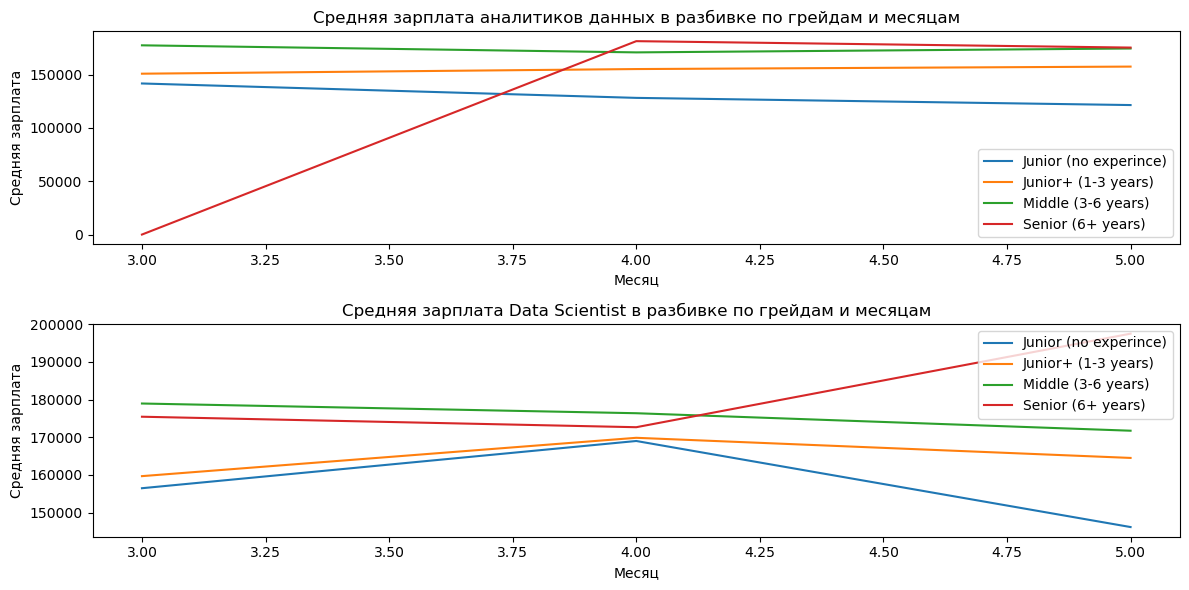

In [83]:
# Создание графиков
plt.figure(figsize=(12, 6))

# График для аналитиков данных
plt.subplot(2, 1, 1)
for exp_level in ['Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)','Senior (6+ years)']:
    plt.plot(df_analyst['month'], df_analyst[exp_level], label=exp_level)
plt.xlabel('Месяц')
plt.ylabel('Средняя зарплата')
plt.title('Средняя зарплата аналитиков данных в разбивке по грейдам и месяцам')
plt.legend()

# График для Data Scientist
plt.subplot(2, 1, 2)
for exp_level in ['Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)','Senior (6+ years)']:
    plt.plot(df_scientist["month"], df_scientist[exp_level], label=exp_level)
plt.xlabel('Месяц')
plt.ylabel('Средняя зарплата')
plt.title('Средняя зарплата Data Scientist в разбивке по грейдам и месяцам')
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
df_analyst.columns.tolist()

['month',
 'Junior (no experince)',
 'Junior+ (1-3 years)',
 'Middle (3-6 years)',
 'Senior (6+ years)']

### **Вывод по разделу 3.2.5**

Мы провели анализ средней зарплаты по месяцам в разбивке по грейдам. 

*Для грейда Junior (no experience)*:  
Для вакансий "Аналитик данных" средняя зарплата в вакансиях уменьшилась в мае 2024 по сравнению с мартом 2024.  
Для вакансий "Data Scientist" в целом имелась динамика на снижение средней зарплаты, кроме апреля 2024, где мы видим рост по сравнению с другими месяцами.

*Для грейда Junior+ (1-3 years)*:  
Для вакансий "Аналитик данных" средняя зарплата в вакансиях в период с марта 2024 по май 2024 находилась примерно на одном уровне 155 тыс. руб.  
Для вакансий "Data Scientist" ситуация аналогична предыдущему грейду, где мы видим скачок зарплаты до 170 тыс. руб. в апреле 2024.

*Для грейда Middle (3-6 years)*:  
Для вакансий "Аналитик данных" средняя зарплата в вакансиях уменьшилась в мае 2024 по сравнению с мартом 2024.  
Для вакансий "Data Scientist" средняя зарплата примерно на одном уровне 175 тыс.руб.

*Для грейда Senior (6+ years)*:  
Для вакансий "Аналитик данных" средняя зарплата в апреле выше, чем в мае 2024, вакансий за март нет.  
Для вакансий "Data Scientist" мы видим подъем средней зарплаты в мае до 190 тыс. руб. по сравнению в мартом и апрелем



### Общее наблюдение:

1. *Аналитик данных:*
   - Видим, что средняя зарплата растет с уровнем опыта.
   - Самая высокая зарплата у Senior аналитиков.
   - Можно предположить, что с ростом опыта зарплата также увеличивается.

2. *Data Scientist:*
   - Здесь также наблюдается рост зарплаты с уровнем опыта.
   - Senior Data Scientist получают наибольшую зарплату.
   - Возможно, опытные специалисты в этой области ценятся больше.

#### 3.2.6 Определение типичного места работы для вакансий "Аналитика данных" и "Data Scientist" по типу занятости

In [85]:
type_empl=data.groupby(['employment','vac_name']).size().reset_index(name='count') # группируем данные по типу занятости и названию вакансии
type_empl

,employment,vac_name,count
0,Полная занятость,data scientist,728
1,Полная занятость,аналитик данных,1382
2,Проектная работа,data scientist,4
3,Проектная работа,аналитик данных,4
4,Стажировка,data scientist,13
5,Стажировка,аналитик данных,12
6,Частичная занятость,data scientist,7
7,Частичная занятость,аналитик данных,12


In [86]:
type_pivot=type_empl.pivot_table(index='employment', columns='vac_name', values='count').reset_index().fillna(0) # формируем пивот
type_pivot

vac_name,employment,data scientist,аналитик данных
0,Полная занятость,728.0,1382.0
1,Проектная работа,4.0,4.0
2,Стажировка,13.0,12.0
3,Частичная занятость,7.0,12.0


In [87]:
total_vacancies_ds = type_pivot['data scientist'].sum()# считаем общее количество вакансий
total_vacancies_ds

752.0

In [88]:
total_vacancies_da = type_pivot['аналитик данных'].sum()# считаем общее количество вакансий
total_vacancies_da

1410.0

In [89]:
type_pivot['data scientist, %'] = round((type_pivot['data scientist'] / total_vacancies_ds) * 100,2) # добавляем столбец с долей вакансий для специальности 

In [90]:
type_pivot['аналитик данных, %'] = round((type_pivot['аналитик данных'] / total_vacancies_da) * 100.2) # добавляем столбец с долей вакансий для специальности 

In [91]:
type_pivot # выводим пивот

vac_name,employment,data scientist,аналитик данных,"data scientist, %","аналитик данных, %"
0,Полная занятость,728.0,1382.0,96.81,98.0
1,Проектная работа,4.0,4.0,0.53,0.0
2,Стажировка,13.0,12.0,1.73,1.0
3,Частичная занятость,7.0,12.0,0.93,1.0


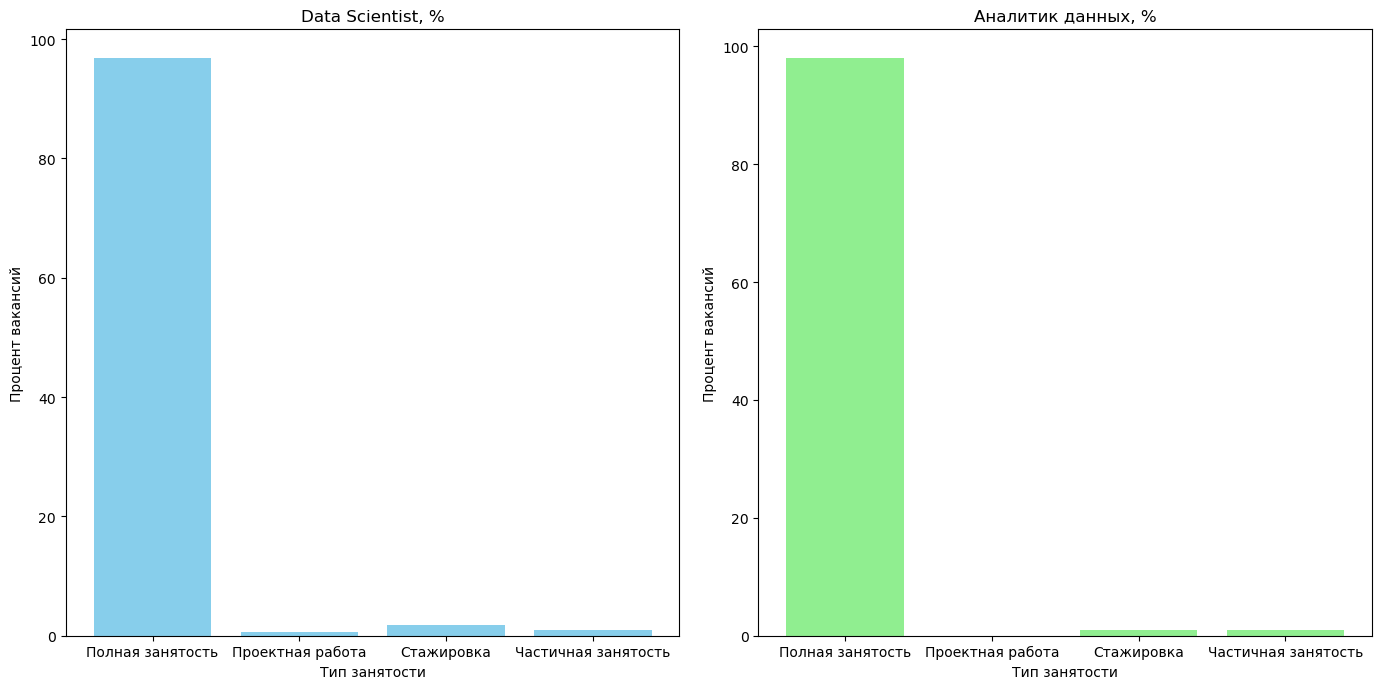

In [92]:
# Создание фигуры и осей
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Построение первого графика для Data Scientist
ax1.bar(type_pivot['employment'], type_pivot['data scientist, %'], color='skyblue')
ax1.set_xlabel('Тип занятости')
ax1.set_ylabel('Процент вакансий')
ax1.set_title('Data Scientist, %')

# Построение второго графика для Аналитика данных
ax2.bar(type_pivot['employment'], type_pivot['аналитик данных, %'], color='lightgreen')
ax2.set_xlabel('Тип занятости')
ax2.set_ylabel('Процент вакансий')
ax2.set_title('Аналитик данных, %')

# Показ графиков
plt.tight_layout()
plt.show()

**Вывод по разделу 3.2.6**

Мы провели анализ по типу занятости, указанной в вакансиях "Аналитик данных" и "Data scientist" за период с марта 2024 по май 2024. 
В данных имеются 4 типа занятости: полная занятость, проектная работа, стажировка и частичная занятость.
Для обеих вакансий превалирует полная занятость и составляет в среднем 97%

#### 3.2.7 Определение типичного места работы для Аналитика данных и Data Scientist по Графику работы

In [93]:
scedul_pivot=data.pivot_table(index='schedule', columns='vac_name', values='id',aggfunc='count') # формируем пивот с графиков работы в вакансиях в разбивке по специальностям

In [94]:
scedul_pivot['total']=scedul_pivot['data scientist']+scedul_pivot['аналитик данных'] # считаем общее количество вакансий для 2х специальностей

In [95]:
scedul_pivot['ratio_ds,%']=round((scedul_pivot['data scientist']/scedul_pivot['data scientist'].sum())*100,2) # считаем долю вакансий в зависимости от типа графика

In [96]:
scedul_pivot['ratio_da,%']=round((scedul_pivot['аналитик данных']/scedul_pivot['аналитик данных'].sum())*100,2) # считаем долю вакансий в зависимости от типа графика

In [97]:
scedul_pivot.sort_values(by='total', ascending=False) # сортируем данные по общему количеству вакансий

vac_name,data scientist,аналитик данных,total,"ratio_ds,%","ratio_da,%"
schedule,,,,,
Полный день,564,1130,1694,75.00,80.14
Удаленная работа,150,240,390,19.95,17.02
Гибкий график,35,33,68,4.65,2.34
Сменный график,3,7,10,0.40,0.50


C:\Users\Admin\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

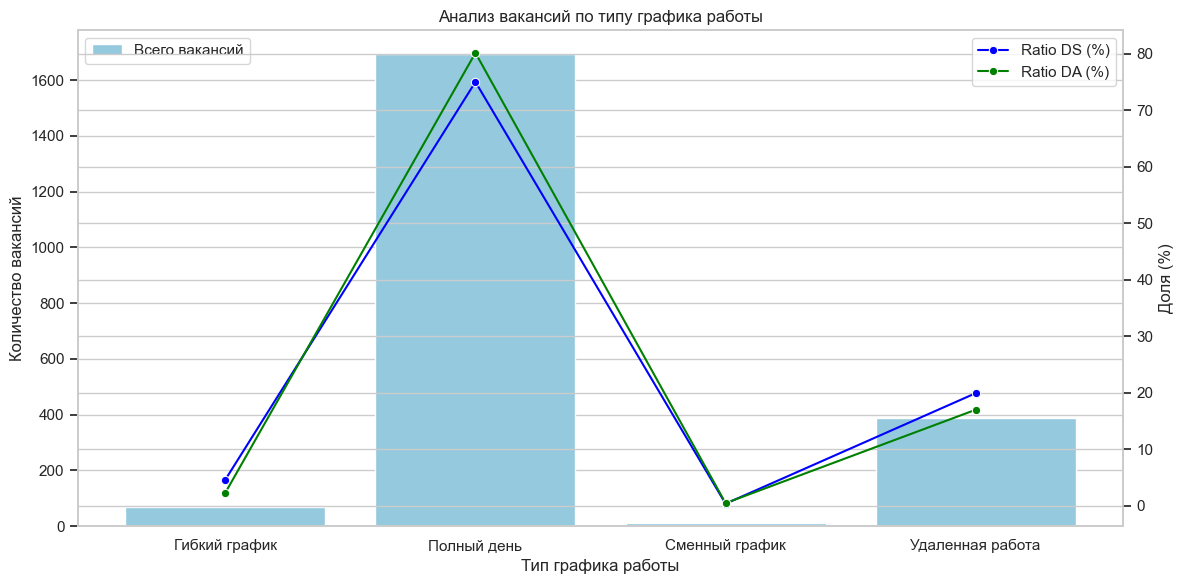

In [98]:
# Установка стиля для графиков
sns.set(style="whitegrid")

# Создание фигуры и осей
fig, ax1 = plt.subplots(figsize=(12, 6))

# Построение столбчатой диаграммы для количества вакансий
sns.barplot(x=scedul_pivot.index, y='total', data=scedul_pivot, ax=ax1, color='skyblue', label='Всего вакансий')

# Добавление второго графика для долей (ratio)
ax2 = ax1.twinx()
sns.lineplot(x=scedul_pivot.index, y='ratio_ds,%', data=scedul_pivot, ax=ax2, color='blue', marker='o', label='Ratio DS (%)')
sns.lineplot(x=scedul_pivot.index, y='ratio_da,%', data=scedul_pivot, ax=ax2, color='green', marker='o', label='Ratio DA (%)')

# Настройка осей и заголовков
ax1.set_xlabel('Тип графика работы')
ax1.set_ylabel('Количество вакансий')
ax2.set_ylabel('Доля (%)')
ax1.set_title('Анализ вакансий по типу графика работы')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Показ графика
plt.tight_layout()
plt.show()

**Вывод по разделу 3.2.7**

Мы провели анализ типичного места работы для Аналитика данных и Data Scientist по Графику работы.
В целом в вакансиях представлены 4 графика работы: это полный день, гибкий график, сменный график и удаленная работа.
Для обеих вакансий превалирует полный день, для вакансии Data Scientis составляет 74% от всех вакансий, для Аналитика данных 80% всех вакансий.
На последнем месте по условиям найма стоит сменный график и занимает в среднем 0,5% от всех вакансий

### 3.3 Определение, какие навыки спрашивают чаще - твердые или мягкие.

In [99]:
data.head() # выводим первые 4 строк датафрейма

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_name,salary_mean,month
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",...,наш направление заниматься повышение эффективн...,60000.000000,119713.333333,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,аналитик данных,89856.666667,5
1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",...,сегодня комус крупный поставщик офисный товар ...,136829.397516,214055.069231,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,аналитик данных,175442.233373,5
2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",...,наш направление заниматься повышение эффективн...,90000.000000,119713.333333,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,аналитик данных,104856.666667,5
3,100046788,ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",...,задача разработка бизнес модель групповой прог...,136829.397516,214055.069231,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,аналитик данных,175442.233373,5
4,100056244,аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],...,обязанность участие проектирование разработка ...,136829.397516,214055.069231,ЗП не указана,NaN,NaN,Документация,аналитик данных,175442.233373,5


In [100]:
list_skills=list(data_da['key_skills_from_key_skills_field'].unique()) # формируем список всех уникальных значений в столбце со скиллами

In [101]:
# разделяем список на отдельные значения
all_values = []
for i in list_skills:
    if isinstance(i, str):
        all_values.extend(i.split(', '))

In [102]:
# считаем частоту повторения скиллов из списка и формируем датафрейм из 100 самых популярных скиллов
frequency = Counter(all_values)
df_frequency=pd.DataFrame(frequency.items(),columns=['skill','frequency'])
skills_to_analyse=df_frequency.sort_values(by='frequency', ascending=False).head(100)
skills_to_analyse

,skill,frequency
0,SQL,415
2,Python,311
19,Анализ данных,249
32,Аналитическое мышление,145
1,Power BI,141
...,...,...
51,WEB аналитика,5
241,Аналитические способности,5
118,Superset,5
282,1С,5


In [103]:
skills_to_analyse['skill'].unique() # выводим все уникальные скиллы 

array(['SQL', 'Python', 'Анализ данных', 'Аналитическое мышление',
       'Power BI', 'MS Excel', 'Работа с базами данных',
       'Работа с большим объемом информации', 'Аналитика',
       'Data Analysis', 'MS SQL', 'Базы данных',
       'Аналитические исследования', 'Tableau',
       'Математическая статистика', 'Сбор и анализ информации',
       'PostgreSQL', 'Big Data', 'Статистический анализ', 'MS PowerPoint',
       'ETL', 'Бизнес-анализ', 'Анализ бизнес показателей',
       'Прогнозирование', 'Английский язык', 'Подготовка презентаций',
       'Hadoop', 'MS Power BI', 'Математический анализ',
       'Визуализация данных', 'PowerBI', 'Сводные таблицы', 'VBA',
       'A/B тесты', 'Pandas', 'BI', 'Excel', 'Spark', 'Power Query',
       'Деловая коммуникация', 'Анализ рынка', 'Работа в команде', 'Git',
       'Подготовка отчетов', 'DWH', 'Аналитический склад ума',
       'Google Analytics', 'Маркетинговый анализ', 'Machine Learning',
       'Numpy', 'Airflow', 'ML', 'DAX', 'ORACLE',

In [104]:
# формируем список софт скиллов
soft_skills={'Аналитическое мышление','Работа в команде','Деловая коммуникация','Работа с большим объемом информации','Аналитический склад ума','Управление командой','Управление рисками','Системное мышление','Умение принимать решения','Обучение и развитие'}

In [105]:
# пишем функцию для определения принодлежности скилла к хардовому или софтовому
def skill_type(skill):
    if skill in soft_skills:
        return 'soft'
    else:
        return 'hard'

In [106]:
# применяем функцию к датафрейму
skills_to_analyse['type']=skills_to_analyse['skill'].apply(skill_type)
skills_to_analyse

,skill,frequency,type
0,SQL,415,hard
2,Python,311,hard
19,Анализ данных,249,hard
32,Аналитическое мышление,145,soft
1,Power BI,141,hard
...,...,...,...
51,WEB аналитика,5,hard
241,Аналитические способности,5,hard
118,Superset,5,hard
282,1С,5,hard


In [107]:
# считаем количество хардовых и софтовых скиллов в требованиях к вакансиям "Аналитика данных" 
skills_visual=skills_to_analyse.pivot_table(index='type', values='skill', aggfunc='count').reset_index()
skills_visual

,type,skill
0,hard,93
1,soft,7


In [108]:
list_skills_ds=list(data_ds['key_skills_from_key_skills_field'].unique()) # формируем список всех уникальных значений в столбце со скиллами для вакансий дата сайнтиста

In [109]:
# разделяем список на отдельные значения
all_values_ds = []
for i in list_skills_ds:
    if isinstance(i, str):
        all_values_ds.extend(i.split(', '))

In [110]:
# считаем частоту повторения скиллов из списка и формируем датафрейм из 100 самых популярных скиллов
frequency_ds = Counter(all_values_ds)
df_frequency_ds=pd.DataFrame(frequency_ds.items(),columns=['skill','frequency'])
skills_to_analyse_ds=df_frequency_ds.sort_values(by='frequency', ascending=False).head(100)
skills_to_analyse_ds

,skill,frequency
3,Python,224
0,SQL,131
6,Machine Learning,73
14,ML,60
18,Data Science,43
...,...,...
129,Моделирование,2
160,Golang,2
188,искусственный интеллект,2
157,Алгоритмы и структуры данных,2


In [111]:
skills_to_analyse_ds['skill'].unique() # выводим все уникальные скиллы

array(['Python', 'SQL', 'Machine Learning', 'ML', 'Data Science',
       'Математическая статистика', 'PyTorch', 'Pandas', 'Анализ данных',
       'NLP', 'Big Data', 'Git', 'Data Analysis', 'Машинное обучение',
       'Spark', 'Математическое моделирование', 'Docker', 'Linux',
       'Английский язык', 'Статистический анализ',
       'Аналитическое мышление', 'PostgreSQL', 'Hadoop', 'Deep Learning',
       'Numpy', 'Математический анализ', 'Работа с базами данных',
       'MS SQL', 'LLM', 'Базы данных', 'Airflow', 'Data Mining', 'IT',
       'Аналитические исследования', 'numpy', 'sklearn',
       'Computer Vision', 'CV', 'PySpark', 'Tensorflow', 'ClickHouse',
       'Scikit-learn', 'Прогнозирование', 'Hive', 'TensorFlow',
       'data science', 'NumPy', 'Kubernetes', 'pandas', 'ETL',
       'A/B тесты', 'Разработка поисковых технологий', 'MySQL',
       'Machine learning', 'OpenCV', 'Power BI', 'MLFlow',
       'Работа с большим объемом информации', 'Data Scientist', 'MLflow',
       

In [112]:
skills_to_analyse_ds['type']=skills_to_analyse_ds['skill'].apply(skill_type) # применяем функцию к датафрейму для классификации скиллов на твердые и мягкие
skills_to_analyse_ds

,skill,frequency,type
3,Python,224,hard
0,SQL,131,hard
6,Machine Learning,73,hard
14,ML,60,hard
18,Data Science,43,hard
...,...,...,...
129,Моделирование,2,hard
160,Golang,2,hard
188,искусственный интеллект,2,hard
157,Алгоритмы и структуры данных,2,hard


In [113]:
skills_visual_ds = skills_to_analyse_ds.pivot_table(index='type', values='skill', aggfunc='count').reset_index() # считаем количество хардовых и софтовых скиллов в требованиях к вакансиям "Data scientist" 
skills_visual_ds

,type,skill
0,hard,97
1,soft,3


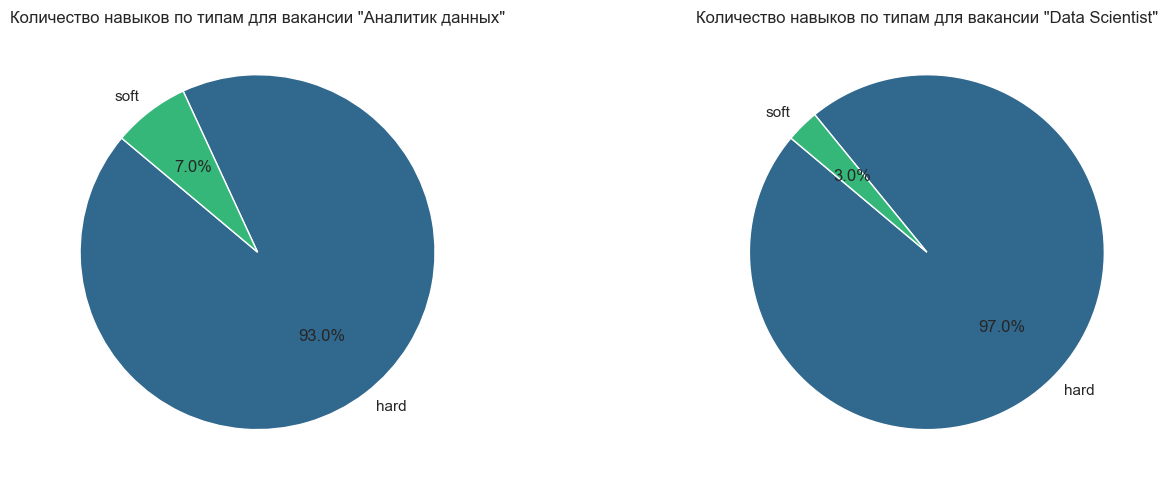

In [114]:
# Установка стиля для графиков
sns.set(style="whitegrid")

# Создание фигуры и осей
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Построение круговой диаграммы для Аналитика данных
axs[0].pie(skills_visual['skill'], labels=skills_visual['type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(skills_visual)))
axs[0].set_title('Количество навыков по типам для вакансии "Аналитик данных"')

# Построение круговой диаграммы для Data Scientist
axs[1].pie(skills_visual_ds['skill'], labels=skills_visual_ds['type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(skills_visual_ds)))
axs[1].set_title('Количество навыков по типам для вакансии "Data Scientist"')

# Показ графиков
plt.tight_layout()
plt.show()

**Вывод по разделу 3.3**

Мы провели анализ требуемых работодателями скиллов для обоих вакансий. В результате анализа выявлено, что для вакансий "Аналитик данных" из 100 проанализированных скиллов 7% - это софт скиллы, а 93% это хард скиллы. Приблизительно такая же картина для вакансий "Data Scientist". 3% - это софт скиллы и 97% - это хард скиллы.

### 3.4 К какому грейду и к какой специальности требований больше.

In [115]:
data['count']=data['key_skills_from_key_skills_field'].astype(str).apply(lambda x:len(x.split(','))) # считаем количество значений в столбце со скиллами

In [116]:
data.pivot_table(index='experience', columns = 'vac_name', values='count',aggfunc='mean').reset_index() # формируем сводную таблицу со средним требованием к вакансиям в разбивке по грейдам

vac_name,experience,data scientist,аналитик данных
0,Junior (no experince),2.648649,3.398148
1,Junior+ (1-3 years),3.547904,4.272941
2,Middle (3-6 years),3.669468,4.337104
3,Senior (6+ years),5.375000,7.100000


**Вывод по разделу 3.4**

Мы проанлизировали к какому грейду и к какой специальности требований больше.
В результате анализа выявлено, что больше всего требований для обеих вакансий к грейду Senior (6+ years) и  меньше всего к Junior (no experince), что в целом является достаточно логичным. 

### 3.5 Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Data Scientist по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.

In [117]:
data.head() # выводим первый 5 строк датафрейма

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_name,salary_mean,month,count
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",...,60000.000000,119713.333333,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,аналитик данных,89856.666667,5,4
1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",...,136829.397516,214055.069231,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,аналитик данных,175442.233373,5,3
2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",...,90000.000000,119713.333333,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,аналитик данных,104856.666667,5,6
3,100046788,ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",...,136829.397516,214055.069231,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,аналитик данных,175442.233373,5,13
4,100056244,аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],...,136829.397516,214055.069231,ЗП не указана,NaN,NaN,Документация,аналитик данных,175442.233373,5,1


In [118]:
# Формируем функцию для определения типа навыка
def skill_type(skill):
    hard_skills = {'SQL', 'Python', 'Анализ данных', 'Аналитическое мышление', 'Power BI' 'MS Excel', 
                   'Работа с большим объемом информации', 'Machine Learning', 'ML', 'Data Science'  'Математическая статистика', 'NLP'}
    soft_skills={'Аналитическое мышление','Работа в команде','Деловая коммуникация','Работа с большим объемом информации','Аналитический склад ума',
                'Управление командой','Управление рисками','Системное мышление','Умение принимать решения','Обучение и развитие'}
    
    if skill in hard_skills:
        return 'hard'
    elif skill in soft_skills:
        return 'soft'
    else:
        return 'unknown'

# Формируем функцию для извлечения топ-скиллов
def extract_top_skills(grade, roles):
    result_df = pd.DataFrame()
    
    for role in roles:
        # Фильтрация данных по заданной вакансии и грейду
        role_data = data[data['vac_name'] == role]
        grade_data = role_data[role_data['experience'] == grade]
        
        # Обработка значений в колонке skills_column
        all_values_ds = []
        for i in grade_data['key_skills_from_key_skills_field']:
            if isinstance(i, str):
                all_values_ds.extend(i.split(', '))
        
        # Подсчет частоты встречания скиллов
        skill_counts = Counter(all_values_ds)
        
        # Преобразование в DataFrame
        skills_df = pd.DataFrame(skill_counts.items(), columns=['skill', 'count'])
        skills_df['type'] = skills_df['skill'].apply(skill_type)
        
        # Получение топ-5 хард и софт скиллов
        top_hard_skills = skills_df[skills_df['type'] == 'hard'].sort_values(by='count', ascending=False).head(5)
        top_soft_skills = skills_df[skills_df['type'] == 'soft'].sort_values(by='count', ascending=False).head(5)
        
        # Добавление данных в результирующий DataFrame
        top_hard_skills['role'] = role
        top_hard_skills['grade'] = grade
        top_soft_skills['role'] = role
        top_soft_skills['grade'] = grade
        
        result_df = pd.concat([result_df, top_hard_skills, top_soft_skills])
    
    return result_df

In [119]:
roles = ['data scientist', 'аналитик данных']
grades = ['Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)','Senior (6+ years)']

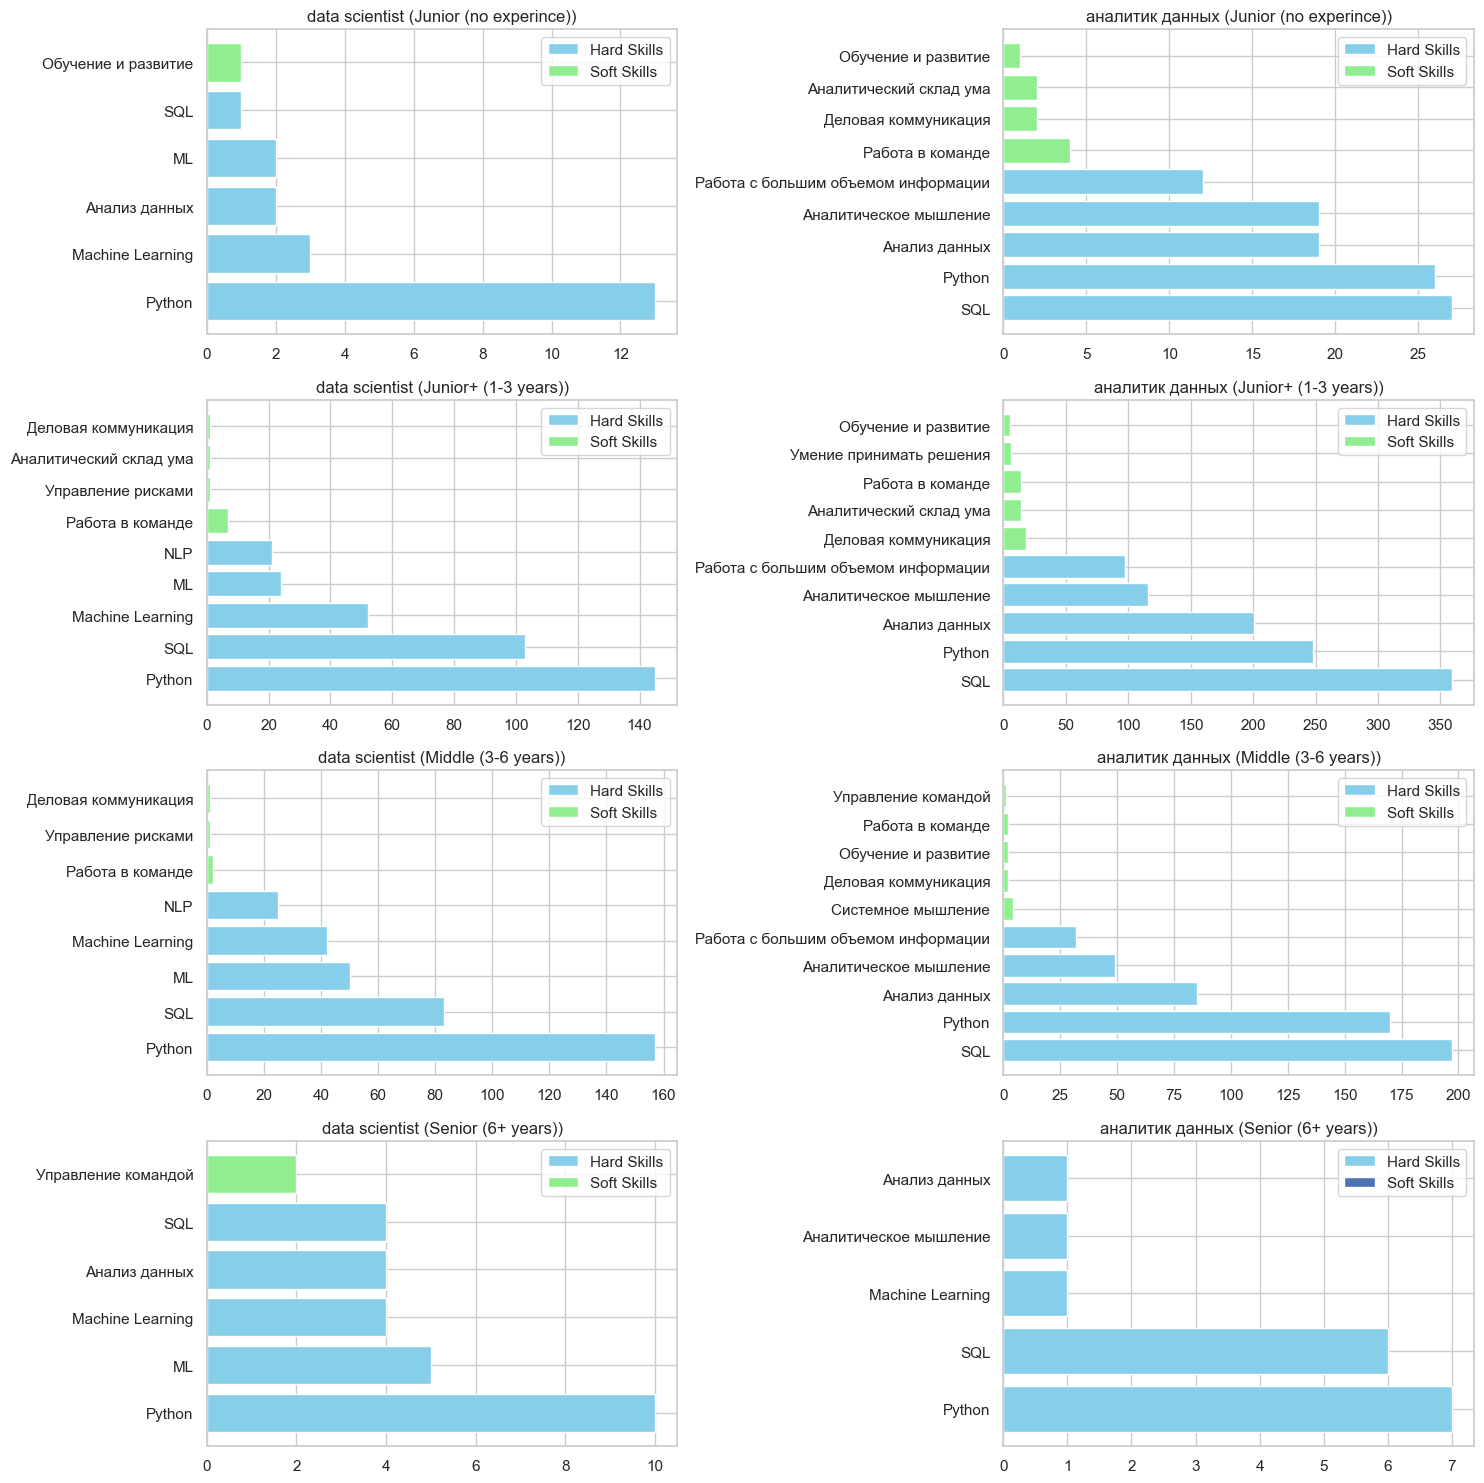

In [120]:
# Создание фигуры и осей
fig, axs = plt.subplots(len(grades), len(roles), figsize=(15, 15))

# Построение горизонтальных столбчатых диаграмм для каждого грейда и роли
for i, grade in enumerate(grades):
    for j, role in enumerate(roles):
        top_skills = extract_top_skills(grade, [role])
        hard_skills = top_skills[top_skills['type'] == 'hard']
        soft_skills = top_skills[top_skills['type'] == 'soft']
        
        # Построение горизонтальной столбчатой диаграммы для хард скиллов
        axs[i, j].barh(hard_skills['skill'], hard_skills['count'], color='skyblue', label='Hard Skills')
        
        # Построение горизонтальной столбчатой диаграммы для софт скиллов
        axs[i, j].barh(soft_skills['skill'], soft_skills['count'], color='lightgreen', label='Soft Skills')
        
        axs[i, j].set_title(f'{role} ({grade})')
        axs[i, j].legend()
            
# Показ графиков
plt.tight_layout()
plt.show()

In [121]:
# Вывод списков топ-скиллов для каждой роли и грейда
for grade in grades:
    for role in roles:
        top_skills = extract_top_skills(grade, [role])
        hard_skills = top_skills[top_skills['type'] == 'hard']
        soft_skills = top_skills[top_skills['type'] == 'soft']
        
        print(f"\nТоп хард скилы для {role} ({grade}):")
        for skill in hard_skills['skill']:
            print(f"- {skill}")
        
        print(f"\nТоп софт скилы для {role} ({grade}):")
        for skill in soft_skills['skill']:
            print(f"- {skill}")


Топ хард скилы для data scientist (Junior (no experince)):
- Python
- Machine Learning
- Анализ данных
- ML
- SQL

Топ софт скилы для data scientist (Junior (no experince)):
- Обучение и развитие

Топ хард скилы для аналитик данных (Junior (no experince)):
- SQL
- Python
- Анализ данных
- Аналитическое мышление
- Работа с большим объемом информации

Топ софт скилы для аналитик данных (Junior (no experince)):
- Работа в команде
- Деловая коммуникация
- Аналитический склад ума
- Обучение и развитие

Топ хард скилы для data scientist (Junior+ (1-3 years)):
- Python
- SQL
- Machine Learning
- ML
- NLP

Топ софт скилы для data scientist (Junior+ (1-3 years)):
- Работа в команде
- Управление рисками
- Аналитический склад ума
- Деловая коммуникация

Топ хард скилы для аналитик данных (Junior+ (1-3 years)):
- SQL
- Python
- Анализ данных
- Аналитическое мышление
- Работа с большим объемом информации

Топ софт скилы для аналитик данных (Junior+ (1-3 years)):
- Деловая коммуникация
- Аналитичес

**Вывод по разделу 3.5**

### Сравнение вакансий "Аналитик данных" и "Data Scientist" по важным навыкам

#### Junior (no experience)

*Data Scientist:*
- *Hard skills:* Python, Machine Learning, ML, SQL, Анализ данных
- *Soft skills:* Обучение и развитие

*Аналитик данных:*
- *Hard skills:* SQL, Python, Анализ данных, Аналитическое мышление, Работа с большим объемом информации
- *Soft skills:* Работа в команде, Деловая коммуникация, Аналитический склад ума, Обучение и развитие

*Выводы и наблюдения:*
- Для обеих вакансий важны навыки Python и Анализ данных.
- Data Scientist требует специфических навыков в области Machine Learning и ML, тогда как Аналитик данных акцентирует внимание на Аналитическом мышлении и работе с большим объемом информации.
- Важные софт скиллы для Data Scientist включают Обучение и развитие, в то время как для Аналитика данных важны также Работа в команде и Деловая коммуникация.

#### Junior+ (1-3 years)

*Data Scientist:*
- *Hard skills:* Python, SQL, Machine Learning, ML, NLP
- *Soft skills:* Работа в команде, Аналитический склад ума, Управление рисками, Деловая коммуникация

*Аналитик данных:*
- *Hard skills:* SQL, Python, Анализ данных, Аналитическое мышление, Работа с большим объемом информации
- *Soft skills:* Деловая коммуникация, Аналитический склад ума, Работа в команде, Умение принимать решения, Системное мышление

*Выводы и наблюдения:*
- Оба направления требуют навыков Python и SQL.
- Data Scientist требует дополнительных навыков в области NLP и управления рисками.
- Аналитик данных акцентирует внимание на Умении принимать решения и Системном мышлении.

#### Middle (3-6 years)

*Data Scientist:*
- *Hard skills:* Python, SQL, ML, Machine Learning, NLP
- *Soft skills:* Управление командой, Работа в команде, Обучение и развитие, Управление рисками, Деловая коммуникация

*Аналитик данных:*
- *Hard skills:* SQL, Python, Анализ данных, Аналитическое мышление, Работа с большим объемом информации
- *Soft skills:* Системное мышление, Работа в команде, Обучение и развитие, Деловая коммуникация, Управление командой

*Выводы и наблюдения:*
- Оба направления требуют навыков Python и SQL.
- Data Scientist требует навыков NLP и управления рисками.
- Аналитик данных акцентирует внимание на Системном мышлении и управлении командой.

#### Senior (6+ years)

*Data Scientist:*
- *Hard skills:* Python, SQL, Анализ данных, ML, Machine Learning
- *Soft skills:* Управление командой, Управление рисками

*Аналитик данных:*
- *Hard skills:* SQL, Python, Machine Learning, Аналитическое мышление, Анализ данных
- *Soft skills:* Управление командой, Управление рисками

*Выводы и наблюдения:*
- Для обеих вакансий важны навыки Python, SQL и Анализ данных.
- Оба направления требуют навыков Machine Learning и управления командой.
- Важные софт скиллы для обеих вакансий включают Управление рисками.

### Общие выводы:
- Python и SQL являются ключевыми навыками для обеих вакансий на всех уровнях.
- Data Scientist требует более специфических навыков в области Machine Learning и NLP.
- Аналитик данных акцентирует внимание на Аналитическом мышлении и работе с большим объемом информации.
- Софт скиллы, такие как Работа в команде и Деловая коммуникация, важны для обеих вакансий, но для Data Scientist также важны навыки управления рисками.

### 3.6 Расчет помесячной динамики количества вакансий для Аналитика данных и Data Scientist. 

In [122]:
data_da.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_name,month
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,аналитик данных,5
1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",...,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,аналитик данных,5
2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,аналитик данных,5
3,100046788,ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",...,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,аналитик данных,5
4,100056244,аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],...,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,аналитик данных,5


In [123]:
pivot_da = data_da.pivot_table(index='month', columns='experience', values='id', aggfunc='count').fillna(0) # создание сводной таблицы
pivot_da

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
month,,,,
3,23,210,120,1
4,45,284,138,4
5,40,356,184,5


In [124]:
pivot_ds = data_ds.pivot_table(index='month', columns='experience', values='id', aggfunc='count').fillna(0) # создание сводной таблицы
pivot_ds

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
month,,,,
3,9,121,127,9
4,21,142,146,10
5,7,71,84,5


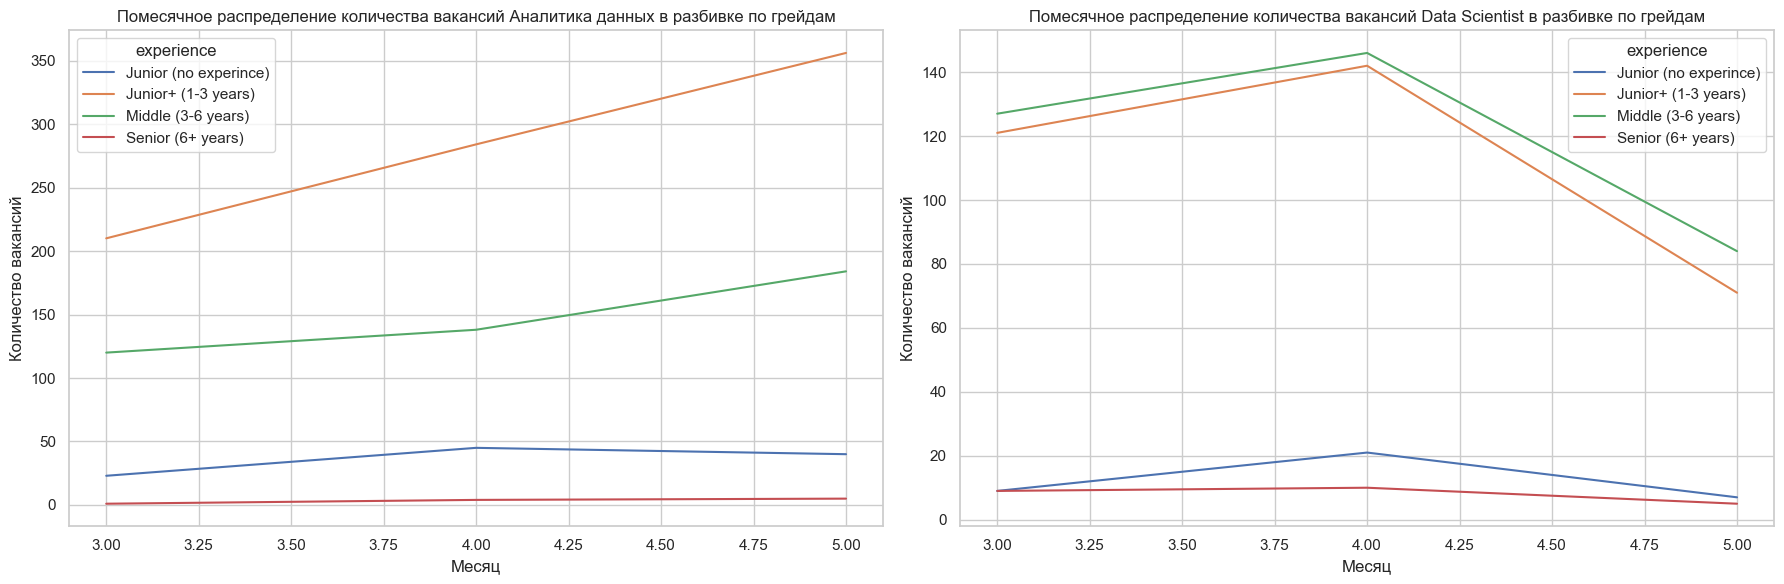

In [125]:
# Создание фигуры и осей для двух графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Построение первого графика
pivot_da.plot(ax=ax1)
ax1.set_xlabel('Месяц')
ax1.set_ylabel('Количество вакансий')
ax1.set_title('Помесячное распределение количества вакансий Аналитика данных в разбивке по грейдам')

# Построение второго графика
pivot_ds.plot(ax=ax2)
ax2.set_xlabel('Месяц')
ax2.set_ylabel('Количество вакансий')
ax2.set_title('Помесячное распределение количества вакансий Data Scientist в разбивке по грейдам')

# Отображение графиков
plt.tight_layout()
plt.show()

**Вывод по разделу 3.6**

Мы провели расчет помесячной динамики количества вакансий для Аналитика данных и Data Scientist за период с марта 2024 по май 2024. 
В результате анализа выявлено, что в целом больше всего вакансий для грейда Junior+ (1-3 years) специальности "Аналитик данных" и грейда Middle (3-6 years) специальности "Data Scientist".
Для вакансий "Аналитик данных" мы видим пик количества вакансий в мае 2024. 
Для вакансий "Data Scientist" мы видим пик вакансий в апреле 2024 года.


# 4. Выводы

## *1. Загрузка данных выполнена успешно.*

## *2. Проведена предобработка данных.*

### 2.1. Мы проверили пропуски в данных. 
Критичные пропуски выявлены в столбцах с зарплатой, замена будет выполнена в следующих разделах.

### 2.2. Мы проверили данные на наличие дубликатов.
Явных дубликатов не выявлено. В целом выявлены вакансии, в которых полностью совпадают значения в полях employer, name, key_skills, description. При этом существуют различия в дате публикации, что говорит о том, что выявленные строки не являются дубликатами, так как вакансии могли быть опубликованы повторно по причинам необходимости новых сотрудников с аналогичными требованиями.

### Дополнительно определим минимальную и максимальную даты датасета и ограничили выборку период с 01.03.2024 по 31.05.2024

#### Мы ограничили массив периодом с марта по мая 2024 года

## *3. Проведен исследовательский анализ данных.*

### 3.1. Мы провели анализ вакансий в разбивке по грейдам специальностей "Аналитик данных" и "Data Scientist". 

На основании графиков мы видим, что для вакансий "Аналитик данных" требуется большего всего специалистов грейда Junior+ (1-3 years),  а именно 60%.
При этом для вакансий "Data Scientist" большего всего требуется специалистов грейда Middle (3-6 years), а именно 47,5%. На втором месте по необходимости для вакансий "Data Scientist" специалисты грейда Junior+ (1-3 years), таких вакансий 44,4%

#### 3.2.1. Мы проанализировали помесячную динамику вакансий "Аналитик данных" и "Data Scientist" в разбивке по работодателям за период с февраля 2024 по июнь 2024. 

Мы проанлизировали помесячную динамику вакансий "Аналитик данных" и "Data Scientist" в разбивке по работодателям за период с марта по май 2024.

Во первых на графике мы видим, что в не зависимости от специальности больше всего вакансий у Сбера. 
Количество вакансий "Аналитика данных" достигает пика в мае, при этом, если говорить про вакансии "Data Scientist", то мы видим рост в апреле и уменьшение количества в маю.

Количество вакансий "Аналитика данных" компании Озон для вакансии Аналитика данных повторяет динамику Сбера. При этом вакансии компаний WILDBERRIES	и Банк ВТБ (ПАО) показывают рост с марта по май 2024 года.

Если говорить про вакансии "Data Scientist", то в топ работодателей попали такие компании как Ozon, Samokat.tech, Газпромбанк и Т1. Вакансии копаний Ozon и Газпромбанк в целом повторяют динамику Сбера

**Вот несколько возможных причин для наблюдаемых тенденций:**

1. *Сезонные колебания*: Вакансии могут увеличиваться или уменьшаться в зависимости от времени года. Например, компании могут активно нанимать весной, чтобы подготовиться к летним проектам, а затем снижать активность найма к лету.

2. *Проектные циклы*: Вакансии могут быть связаны с конкретными проектами, которые имеют свои временные рамки. Например, завершение одного проекта и начало другого может влиять на количество вакансий.

3. *Экономические факторы*: Изменения в экономике, такие как рост или спад, могут влиять на количество вакансий. Компании могут увеличивать найм в периоды экономического роста и сокращать его в периоды спада.

4. *Конкуренция на рынке труда*: Компании могут активно нанимать, чтобы опередить конкурентов в привлечении талантов. Это может объяснить, почему такие компании, как Сбер и Озон, показывают схожие тенденции.

5. *Внутренние изменения в компаниях*: Реорганизация, изменение стратегий или запуск новых направлений могут влиять на количество вакансий. Например, компании могут увеличивать найм аналитиков данных и Data Scientist для поддержки новых инициатив.

6. *Технологические тренды*: Влияние новых технологий и методов может стимулировать спрос на специалистов в определенные периоды. Например, внедрение новых аналитических инструментов или методов машинного обучения может увеличить спрос на Data Scientist.

Дополнительно, мы провели анализ новостей и событий за рассматриваемый период и вот несколько ключевых моментов:

1. *Сбер*: В новостях не было значительных изменений, которые могли бы напрямую повлиять на динамику вакансий. Однако, как крупная компания, Сбер может испытывать сезонные колебания в найме, связанные с внутренними проектами и стратегиями.

2. *Озон и Wildberries*: Оба маркетплейса показали убытки по итогам 2022 года, что связано с увеличением операционных расходов и стадией активного развития банковских подразделений. Это может объяснить колебания в количестве вакансий, так как компании могут корректировать свои стратегии найма в зависимости от финансовых результатов.

3. *Банк ВТБ (ПАО)*: В новостях не было значительных изменений, которые могли бы повлиять на динамику вакансий.

4. *Samokat.tech, Газпромбанк и Т1*: Для этих компаний также не было значительных новостей, которые могли бы объяснить изменения в количестве вакансий.

В целом, выводы о сезонных колебаниях и влиянии внутренних изменений в компаниях подтверждаются. Увеличение или уменьшение количества вакансий может быть связано с финансовыми результатами, стратегическими изменениями и проектными циклами.


#### 3.2.2. Мы проанализировали ТОП-5 работодателей в зависимости от грейда, указанного в вакансии. 

Мы проанализировали ТОП-5 работодателей в зависимости от грейда, указанной в вакансии. 
Для вакансии аналитика данных греда Junior (no experince) на первом месте стоит Сбер, у которого большего всего вакансий. Таже картина повторяется и для вакансии data scientist. Также компании Сбер первая по числу вакансий и для грейдов Junior+ (1-3 years), и Middle (3-6 years) обоих специальностей.
Для грейда Senior (6+ years) вакансий аналитика данных на первом месте по числу вакансий стоит компания Леруа Мерлен, а для data scientist компания Fundraise Up

#### 3.2.3. Мы проанлизровали зарплату в вакансиях.
Предлагаемая работодателями зарплата на начальном грейде больше у вакансий "Data Scientist" (156 тыс.руб.) чем у вакансий специальности "Аналитик данных" (127 тыс.руб.). При этом к грейду Senior с требуемым опытом больше 6 лет уровень зарплаты выравниваются, но с сохранением лидирования уровня зарплаты у вакансий "Data Scientist" - 180 тыс. руб., против зарплаты у вакансий "Аналитик данных" - 178 тыс. руб.

#### 3.2.4. Мы провели анализ средней зарплаты в разбивке по выбранному работодателю по регионам. 
Мы провели анализ средней зарплаты в разбивке по выбранному работадателю по регионам.
Для анализа мы выбрали работадателя, у которого представлено больше всего вакансий - это Сбер.
Мы видим, что самая высока зарплата как по вакансиям "Аналитик данных" так и по вакансиям "Data Scientist" -  в Москве, и уровень зарплата для обеих специальностей на уровне 175 тыс. руб. Самая низкая зарплата для вакансий "Аналитик данных" - это 47,5 тыс. руб. в Горно-Алтайске и для вакансий "Data Scientist" 75 тыс. руб. в Воронеже

#### 3.2.5. Мы провели анализ средней зарплаты по месяцам в разбивке по грейдам.

Мы провели анализ средней зарплаты по месяцам в разбивке по грейдам. 

*Для грейда Junior (no experience)*:  
Для вакансий "Аналитик данных" средняя зарплата в вакансиях уменьшилась в мае 2024 по сравнению с мартом 2024.  
Для вакансий "Data Scientist" в целом имелась динамика на снижение средней зарплаты, кроме апреля 2024, где мы видим рост по сравнению с другими месяцами.

*Для грейда Junior+ (1-3 years)*:  
Для вакансий "Аналитик данных" средняя зарплата в вакансиях в период с марта 2024 по май 2024 находилась примерно на одном уровне 155 тыс. руб.  
Для вакансий "Data Scientist" ситуация аналогична предыдущему грейду, где мы видим скачок зарплаты до 170 тыс. руб. в апреле 2024.

*Для грейда Middle (3-6 years)*:  
Для вакансий "Аналитик данных" средняя зарплата в вакансиях уменьшилась в мае 2024 по сравнению с мартом 2024.  
Для вакансий "Data Scientist" средняя зарплата примерно на одном уровне 175 тыс.руб.

*Для грейда Senior (6+ years)*:  
Для вакансий "Аналитик данных" средняя зарплата в апреле выше, чем в мае 2024, вакансий за март нет.  
Для вакансий "Data Scientist" мы видим подъем средней зарплаты в мае до 190 тыс. руб. по сравнению в мартом и апрелем

#### Общее наблюдение:

1. *Аналитик данных:*
   - Видим, что средняя зарплата растет с уровнем опыта.
   - Самая высокая зарплата у Senior аналитиков.
   - Можно предположить, что с ростом опыта зарплата также увеличивается.

2. *Data Scientist:*
   - Здесь также наблюдается рост зарплаты с уровнем опыта.
   - Senior Data Scientist получают наибольшую зарплату.
   - Возможно, опытные специалисты в этой области ценятся больше.

#### 3.2.6. Мы провели анализ по типу занятости в вакансиях "Аналитик данных" и "Data Scientist" за период с марта 2024 по июнь 2024.

Мы провели анализ по типу занятости, указанной в вакансиях "Аналитик данных" и "Data scientist" за период с марта 2024 по май 2024. 
В данных имеются 4 типа занятости: полная занятость, проектная работа, стажировка и частичная занятость.
Для обеих вакансий превалирует полная занятость и составляет в среднем 97%

#### 3.2.7. Мы провели анализ типичного места работы для Аналитика данных и Data Scientist по графику работы. 
Мы провели анализ типичного места работы для Аналитика данных и Data Scientist по Графику работы.
В целом в вакансиях представлены 4 графика работы: это полный день, гибкий график, сменный график и удаленная работа.
Для обеих вакансий превалирует полный день, для вакансии Data Scientis составляет 74% от всех вакансий, для Аналитика данных 80% всех вакансий.
На последнем месте по условиям найма стоит сменный график и занимает в среднем 0,5% от всех вакансий

### 3.3. Мы провели анализ требуемых работодателями скиллов для обеих вакансий. 

Мы провели анализ требуемых работодателями скиллов для обоих вакансий. В результате анализа выявлено, что для вакансий "Аналитик данных" из 100 проанализированных скиллов 7% - это софт скиллы, а 93% это хард скиллы. Приблизительно такая же картина для вакансий "Data Scientist". 3% - это софт скиллы и 97% - это хард скиллы.

### 3.4. Мы проанализировали, к какому грейду и к какой специальности требований больше. 

Мы проанлизировали к какому грейду и к какой специальности требований больше.
В результате анализа выявлено, что больше всего требований для обеих вакансий к грейду Senior (6+ years) и  меньше всего к Junior (no experince), что в целом является достаточно логичным. 

### 3.5. Мы определили наиболее желаемых кандидатов на вакансии Аналитик данных и Data Scientist по следующим параметрам: самые важные hard-skils, самые важные soft-skils.

Сравнение вакансий "Аналитик данных" и "Data Scientist" по важным навыкам

#### Junior (no experience)

*Data Scientist:*
- *Hard skills:* Python, Machine Learning, ML, SQL, Анализ данных
- *Soft skills:* Обучение и развитие

*Аналитик данных:*
- *Hard skills:* SQL, Python, Анализ данных, Аналитическое мышление, Работа с большим объемом информации
- *Soft skills:* Работа в команде, Деловая коммуникация, Аналитический склад ума, Обучение и развитие

*Выводы и наблюдения:*
- Для обеих вакансий важны навыки Python и Анализ данных.
- Data Scientist требует специфических навыков в области Machine Learning и ML, тогда как Аналитик данных акцентирует внимание на Аналитическом мышлении и работе с большим объемом информации.
- Важные софт скиллы для Data Scientist включают Обучение и развитие, в то время как для Аналитика данных важны также Работа в команде и Деловая коммуникация.

#### Junior+ (1-3 years)

*Data Scientist:*
- *Hard skills:* Python, SQL, Machine Learning, ML, NLP
- *Soft skills:* Работа в команде, Аналитический склад ума, Управление рисками, Деловая коммуникация

*Аналитик данных:*
- *Hard skills:* SQL, Python, Анализ данных, Аналитическое мышление, Работа с большим объемом информации
- *Soft skills:* Деловая коммуникация, Аналитический склад ума, Работа в команде, Умение принимать решения, Системное мышление

*Выводы и наблюдения:*
- Оба направления требуют навыков Python и SQL.
- Data Scientist требует дополнительных навыков в области NLP и управления рисками.
- Аналитик данных акцентирует внимание на Умении принимать решения и Системном мышлении.

#### Middle (3-6 years)

*Data Scientist:*
- *Hard skills:* Python, SQL, ML, Machine Learning, NLP
- *Soft skills:* Управление командой, Работа в команде, Обучение и развитие, Управление рисками, Деловая коммуникация

*Аналитик данных:*
- *Hard skills:* SQL, Python, Анализ данных, Аналитическое мышление, Работа с большим объемом информации
- *Soft skills:* Системное мышление, Работа в команде, Обучение и развитие, Деловая коммуникация, Управление командой

*Выводы и наблюдения:*
- Оба направления требуют навыков Python и SQL.
- Data Scientist требует навыков NLP и управления рисками.
- Аналитик данных акцентирует внимание на Системном мышлении и управлении командой.

#### Senior (6+ years)

*Data Scientist:*
- *Hard skills:* Python, SQL, Анализ данных, ML, Machine Learning
- *Soft skills:* Управление командой, Управление рисками

*Аналитик данных:*
- *Hard skills:* SQL, Python, Machine Learning, Аналитическое мышление, Анализ данных
- *Soft skills:* Управление командой, Управление рисками

*Выводы и наблюдения:*
- Для обеих вакансий важны навыки Python, SQL и Анализ данных.
- Оба направления требуют навыков Machine Learning и управления командой.
- Важные софт скиллы для обеих вакансий включают Управление рисками.

### Общие выводы:
- Python и SQL являются ключевыми навыками для обеих вакансий на всех уровнях.
- Data Scientist требует более специфических навыков в области Machine Learning и NLP.
- Аналитик данных акцентирует внимание на Аналитическом мышлении и работе с большим объемом информации.
- Софт скиллы, такие как Работа в команде и Деловая коммуникация, важны для обеих вакансий, но для Data Scientist также важны навыки управления рисками.

### 3.6. Мы провели расчет помесячной динамики количества вакансий для Аналитика данных и Data Scientist за период с февраля 2024 по июнь 2024. 

Мы провели расчет помесячной динамики количества вакансий для Аналитика данных и Data Scientist за период с марта 2024 по май 2024. 
В результате анализа выявлено, что в целом больше всего вакансий для грейда Junior+ (1-3 years) специальности "Аналитик данных" и грейда Middle (3-6 years) специальности "Data Scientist".
Для вакансий "Аналитик данных" мы видим пик количества вакансий в мае 2024. 
Для вакансий "Data Scientist" мы видим пик вакансий в апреле 2024 года.

## *Рекомендации:*

1. **Для разработчиков сайта HH.ru**. При формировании вакансий разделить поля, куда работодатель вносит данные по требуемым скиллам, на софт скиллы и хард скиллы, что позволит упростить обработку данных для проведения дальнейшего анализа.
2. **Для пользователей сайта HH.ru, в частности работодателей**. Внедрить регулярный мониторинг и анализ динамики зарплат по грейдам и регионам, чтобы своевременно реагировать на изменения.
3. **Для пользователей сайта HH.ru, в частности соискателей.**

### Рекомендации к развитию по карьерной лестнице

**1. Аналитик данных:**
   
Если вы на начальном уровне (Junior), рекомендую начать с вакансии "Аналитик данных". Это позволит вам получить опыт работы с SQL, Python и анализом данных.   
Постепенно развивайте навыки в области NLP и управления рисками, чтобы перейти на уровень Junior+.   
Для роста к Middle и Senior уровням, углубляйтесь в анализ данных, системное мышление и управление командой

**2. Data Scientist:**
   
- Если вас интересует машинное обучение и анализ данных, начните с вакансии "Data Scientist".   
- На уровне Junior, углубляйтесь в Python, SQL и ML.   
- Для перехода к Middle и Senior уровням, изучайте анализ данных, визуализацию и решайте более сложные задачи.
  
**3. Выбор работодателя:**
   
- Если вы хотите максимизировать зарплату, обратите внимание на Москву, где предложения для обеих вакансий выше.   
- Если важен регион, выберите вакансии в соответствующем городе.
  
**4. Рост:**
   
- Следите за динамикой зарплаты по месяцам и стремитесь к росту опыта и навыков.
  
**5. Зарплата:**
  
Сравнивая рост зарплаты от грейда к грейду и максимальные зарплаты, обе специальности имеют свои преимущества:
1. Аналитик данных: 
Начальная зарплата для аналитика данных может быть ниже, но с ростом опыта она увеличивается.   
Максимальная зарплата для аналитика данных в Москве составляет примерно 180 000 рублей.   
Аналитики данных могут заниматься разнообразными задачами, включая анализ данных, визуализацию и оптимизацию рабочих процессов.
2. Data Scientist:  
Data Scientist начинают с более высокой зарплаты, чем аналитики, и могут зарабатывать от 150 000 рублей до 400 000 рублей в месяц.   
Максимальная зарплата для Data Scientist также выше, чем для аналитика данных.   
Data Scientist занимаются более сложными задачами, включая машинное обучение, анализ больших объемов данных и прогнозирование.

**Итак, если вы хотите начать с более высокой зарплаты и интересуетесь машинным обучением, Data Scientist может быть лучшим выбором. Если вас больше привлекает анализ данных и оптимизация процессов, то аналитик данных также является хорошим вариантом. Важно учесть свои интересы, навыки и карьерные цели при выборе специальности.**